In [1]:
import os

import awkward as ak
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import mplhep as hep

import hist
from hist import Hist


from topcoffea.modules import utils
import topcoffea.modules.eft_helper as efth

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import dctr.modules.plotting_tools as plt_tools
import dctr.modules.DNN_tools as DNN_tools

In [2]:
# full_smeft_hists = utils.get_hist_from_pkl("/users/hnelson2/dctr/analysis/fullSMEFTsim.pkl.gz", allow_empty=False)

In [3]:
# full_smeft_hists['top1_mass'][{'process': sum}]

In [4]:
# name = 'top1_mass'
# h = full_smeft_hists[name][{'process': sum}]
# print(h.values())
# fig, ax = plt.subplots()
# hep.style.use("CMS")
# hep.histplot(h)
# ax.set_xlim([80,250])
# ax.set_title("full centrally produced SMEFTsim sample")

In [5]:
powheg_hists = utils.get_hist_from_pkl("/users/hnelson2/dctr/analysis/0508zeroBin/powheg.pkl.gz", allow_empty=False)
# powheg_cut_hists = utils.get_hist_from_pkl("/users/hnelson2/dctr/analysis/zeroBinHists/powheg_cut.pkl.gz", allow_empty=False)
powheg_pred_hists = utils.get_hist_from_pkl("/users/hnelson2/dctr/analysis/0508zeroBin/powheg_pred.pkl.gz", allow_empty=False)
# powheg_bulk_hists = utils.get_hist_from_pkl("/users/hnelson2/dctr/analysis/0508zeroBin/powheg_bulk.pkl.gz", allow_empty=False)
smeft_hists = utils.get_hist_from_pkl("/users/hnelson2/dctr/analysis/0508zeroBin/smeft.pkl.gz", allow_empty=False)
smeft_cut_hists = utils.get_hist_from_pkl("/users/hnelson2/dctr/analysis/0508zeroBin/smeft_hists_cut.pkl.gz", allow_empty=False)

In [61]:
print(ak.sum(powheg_bulk_hists['njets'].values()))
print(ak.sum(powheg_cut_hists['njets'].values()))
print(ak.sum(powheg_hists['njets'].values()))

1111102.0
54390.0
1165492.0


In [14]:
plotdir = "/users/hnelson2/dctr/analysis/zeroBinHists/plots"

/tmp/ipykernel_361503/2478851278.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


ValueError: Plotting multiple histograms must have the same dimensionality

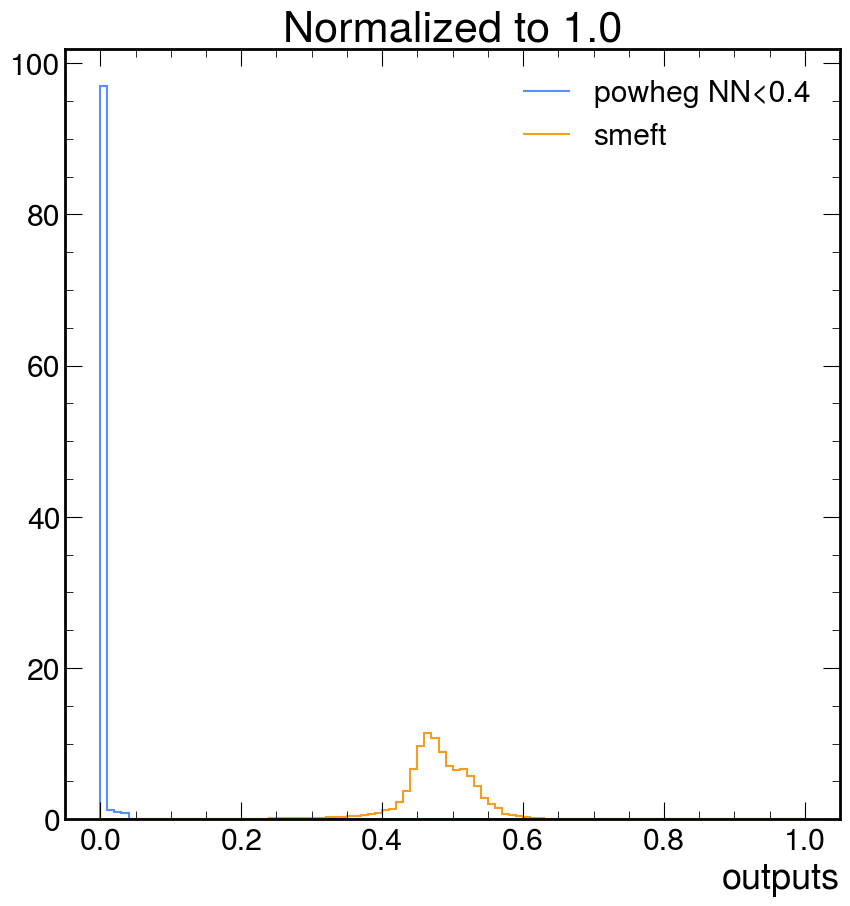

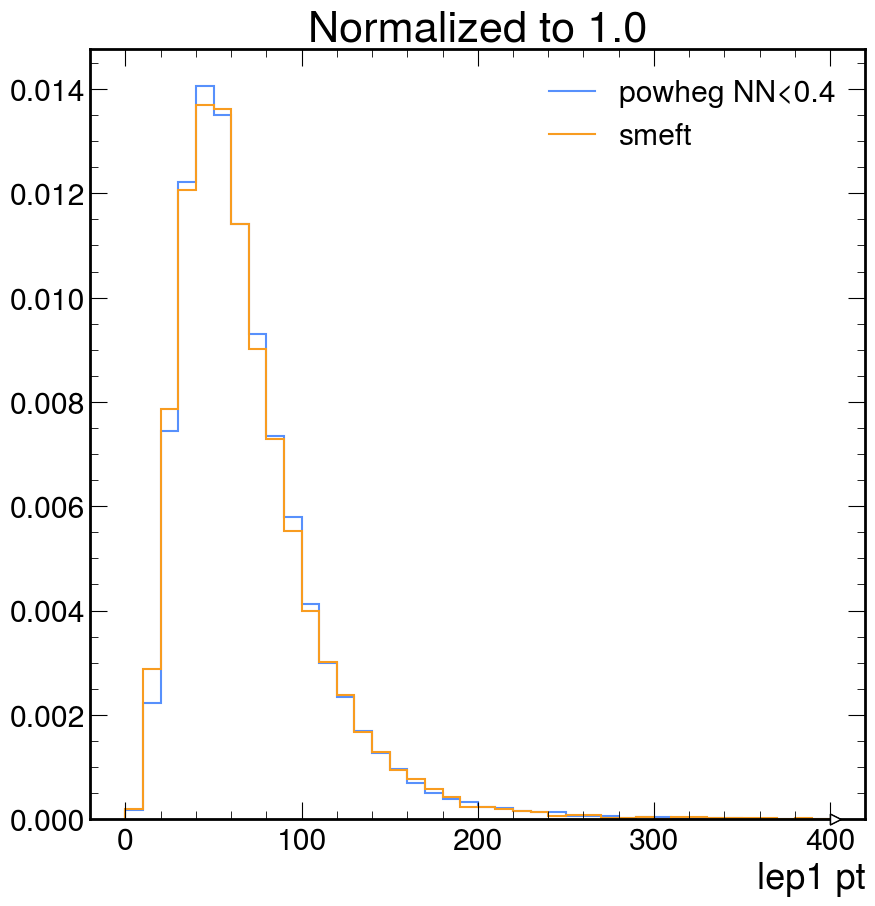

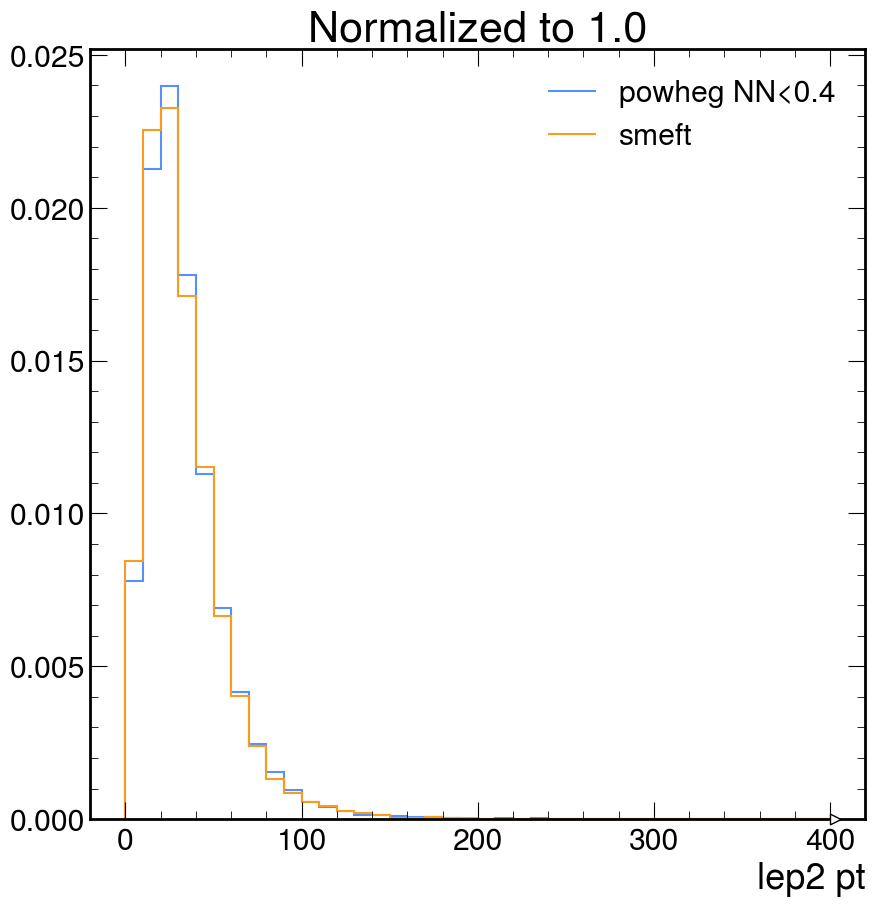

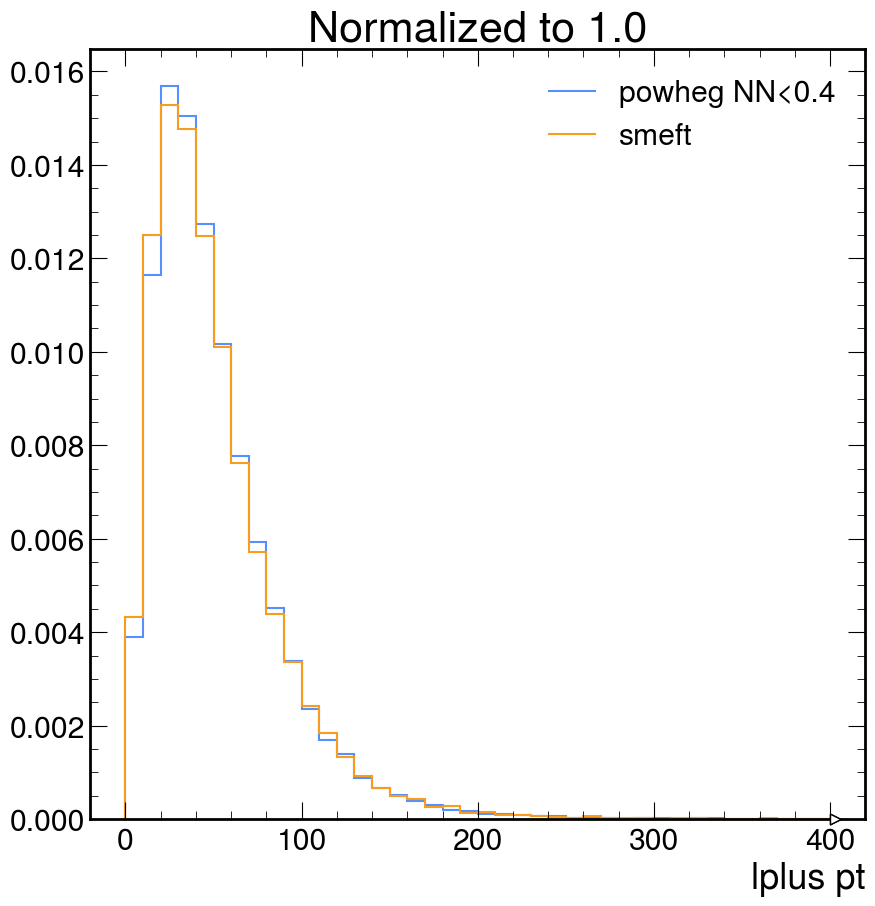

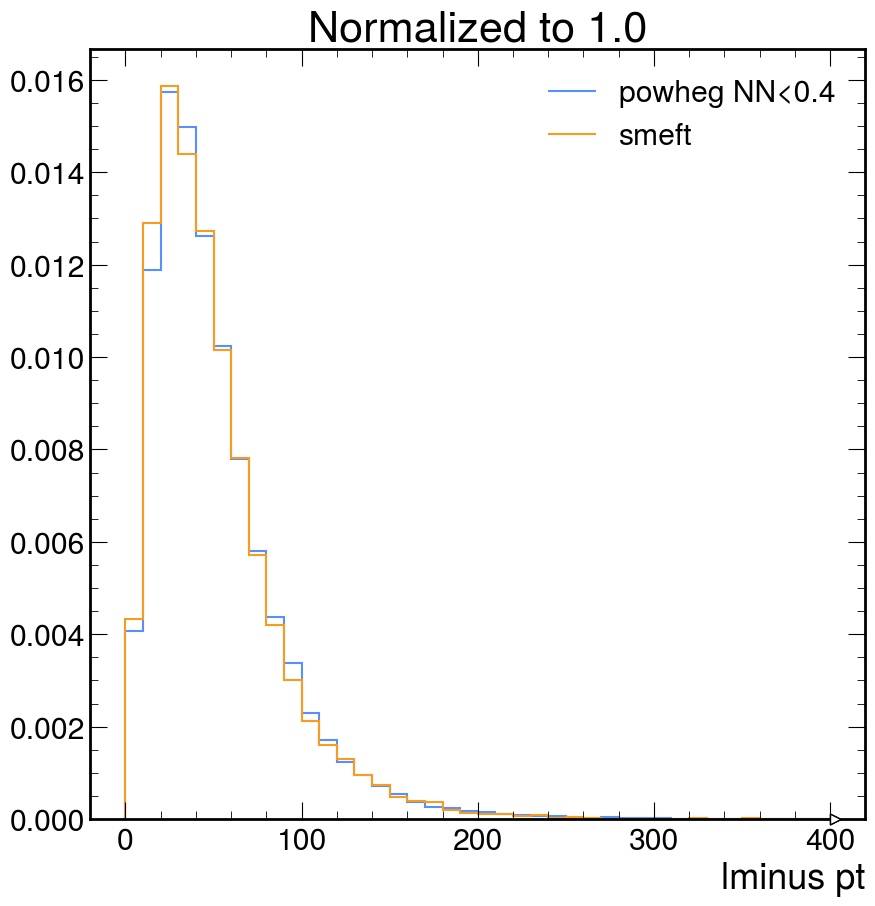

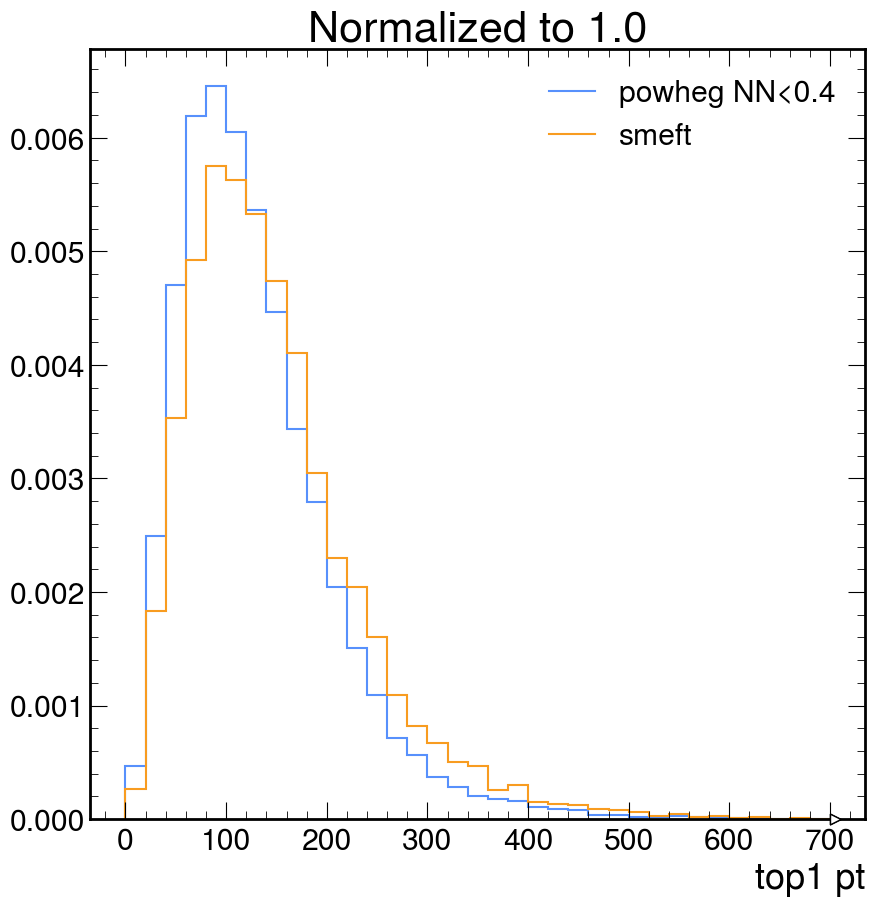

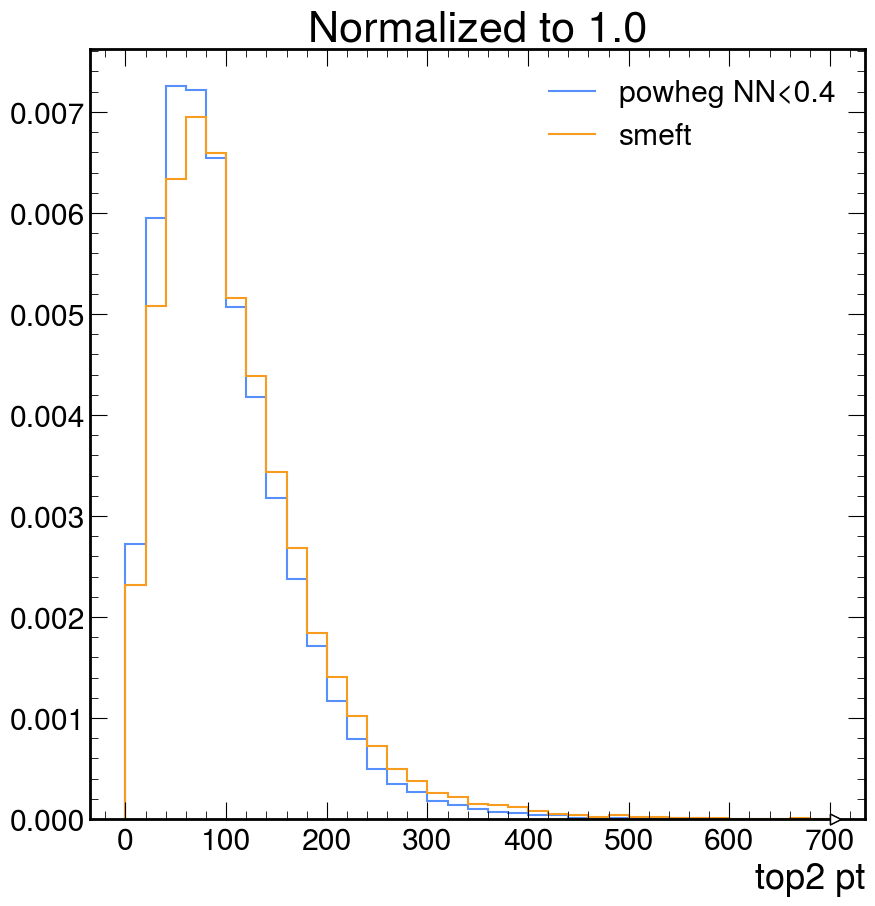

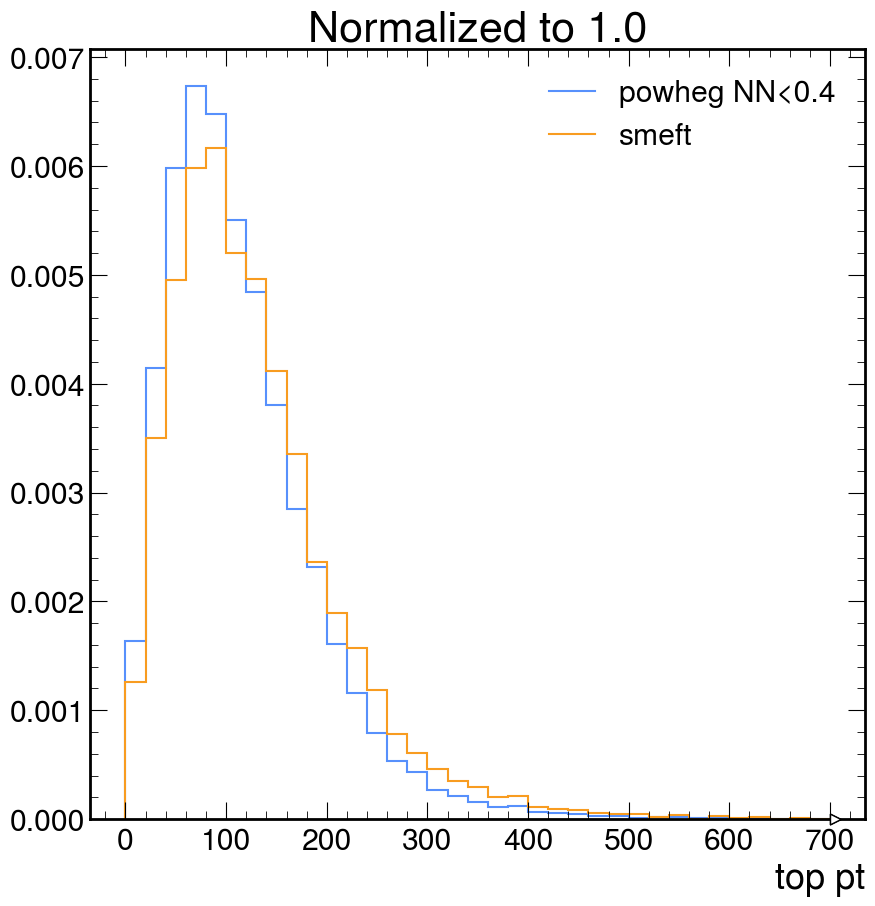

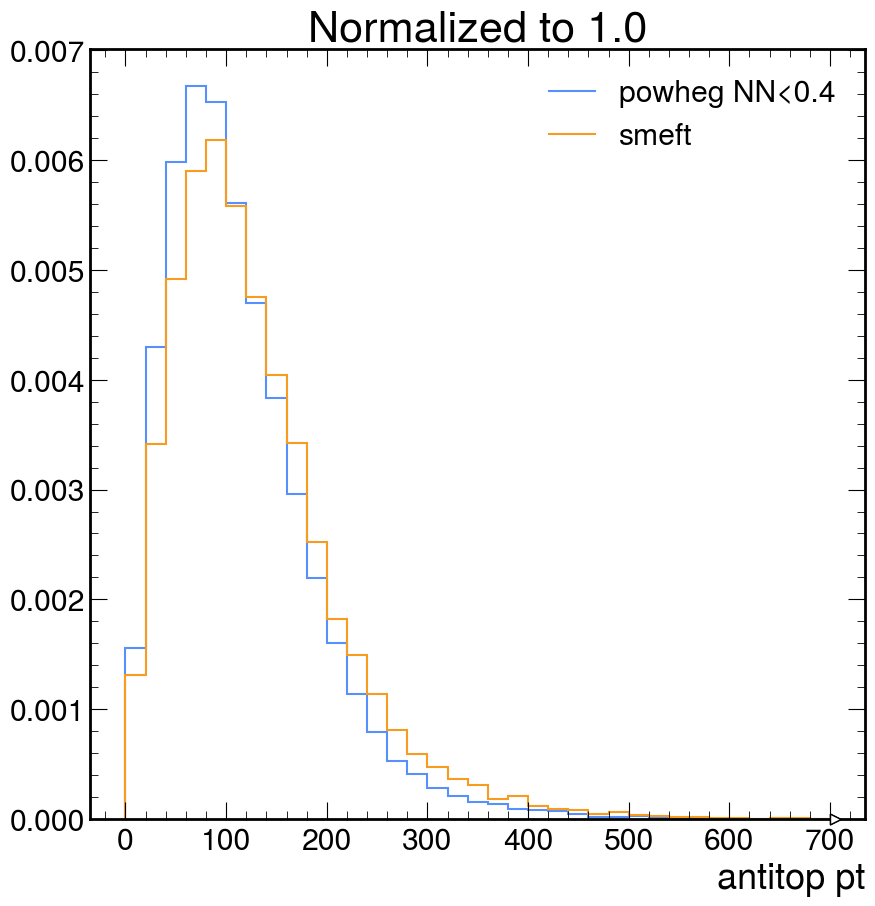

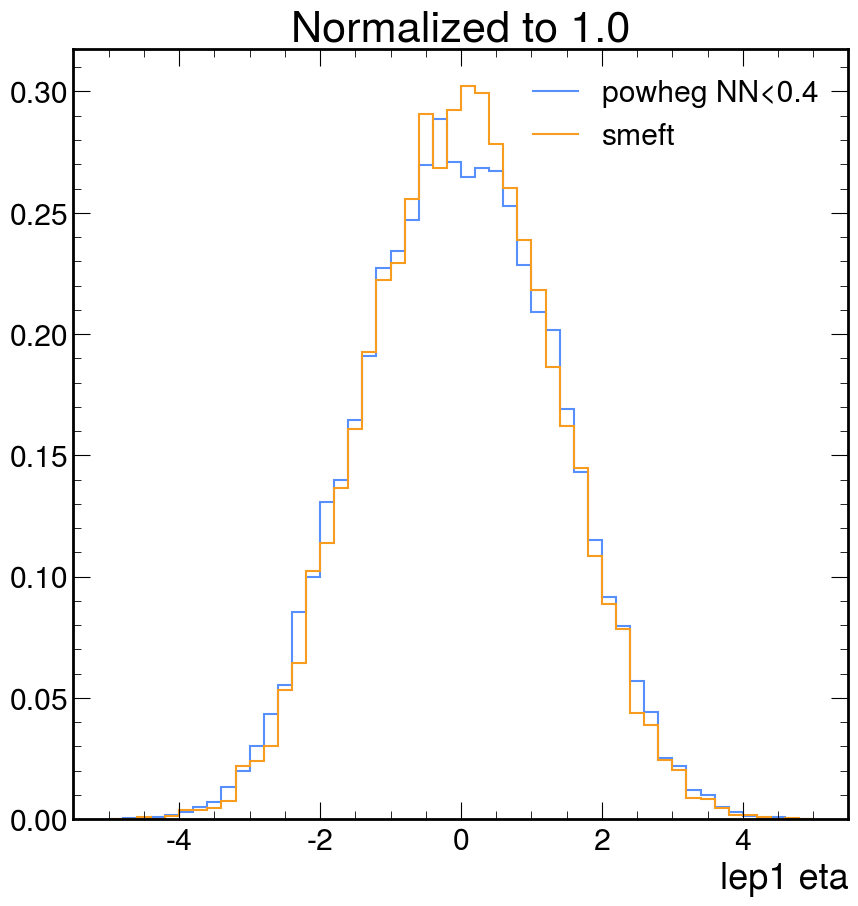

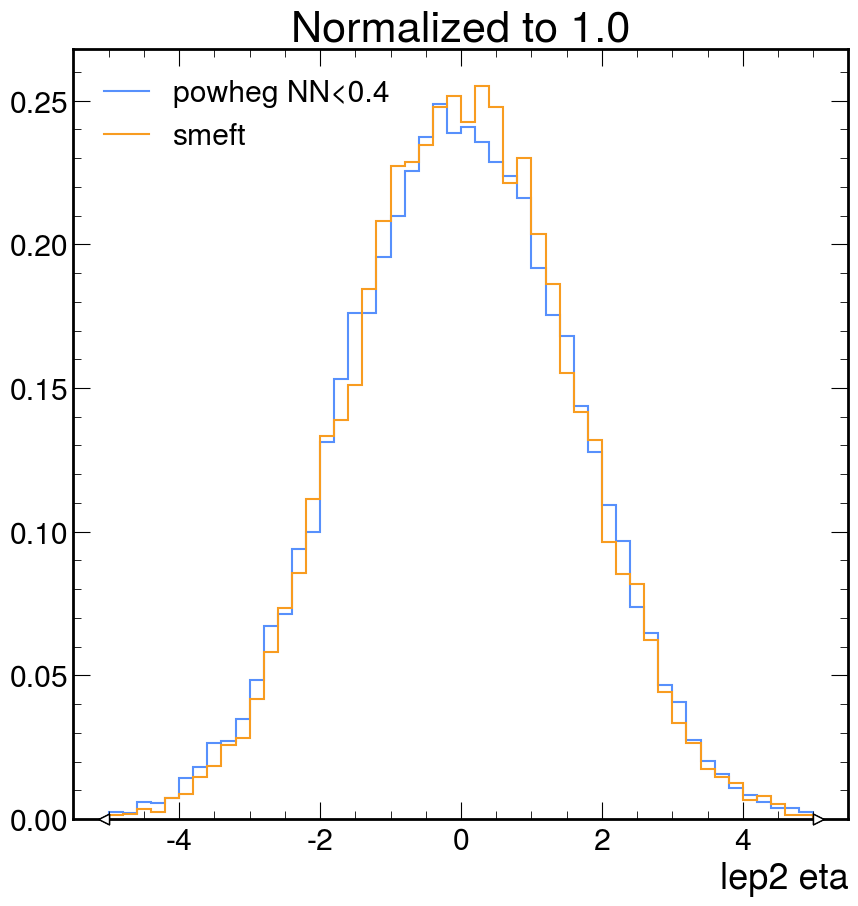

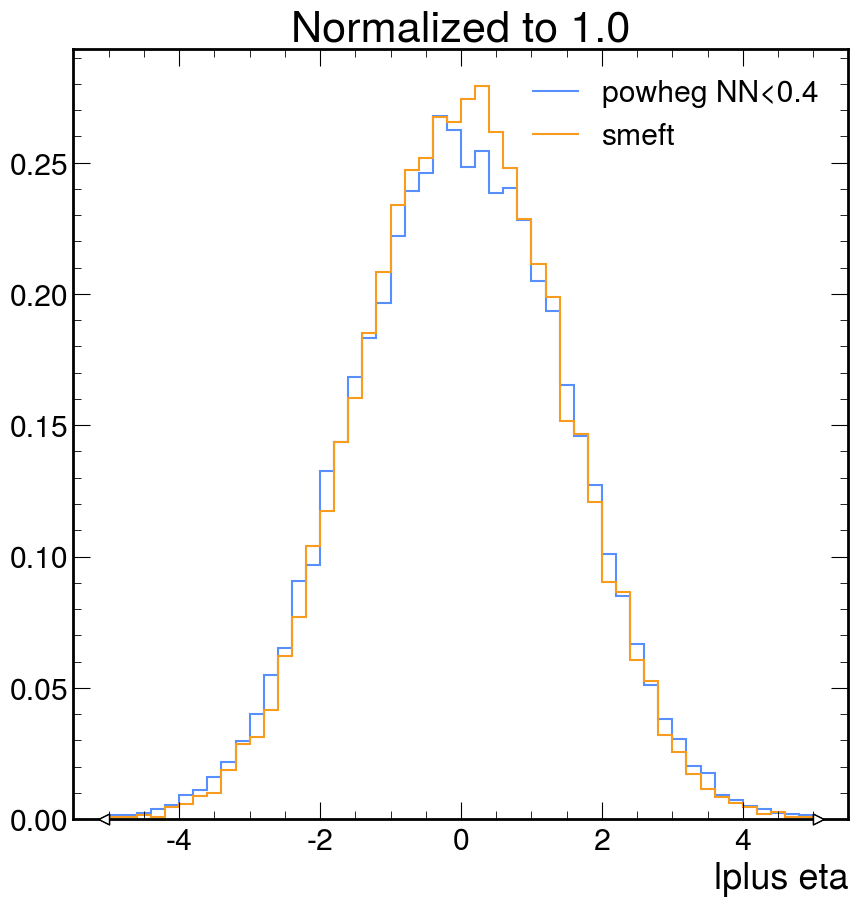

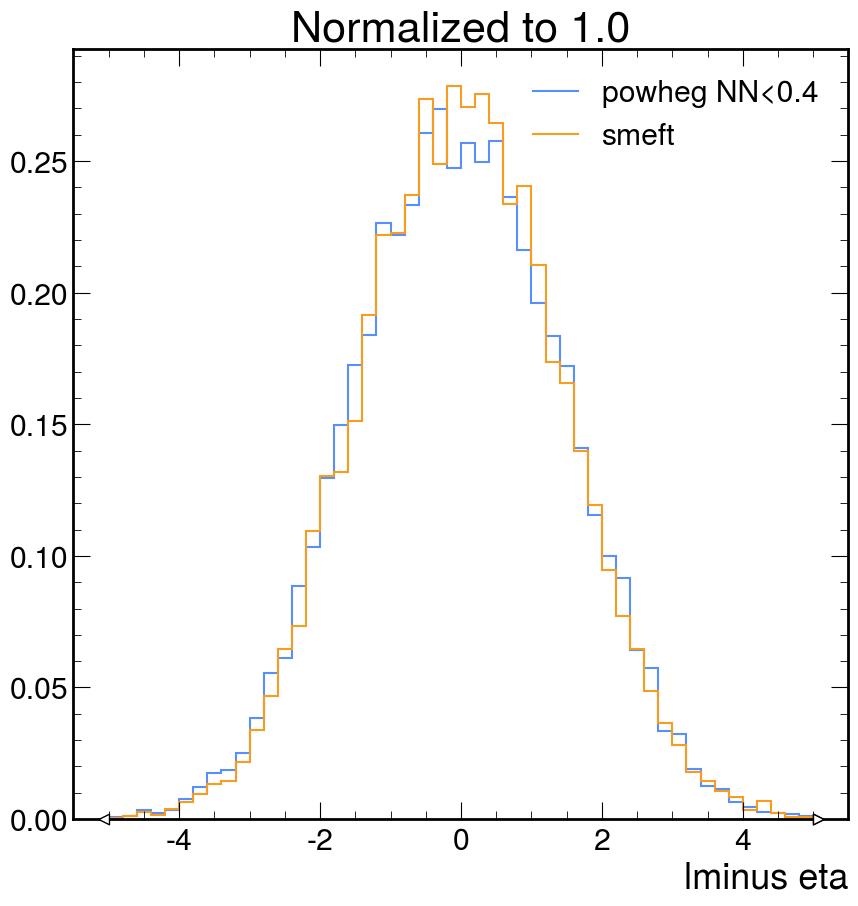

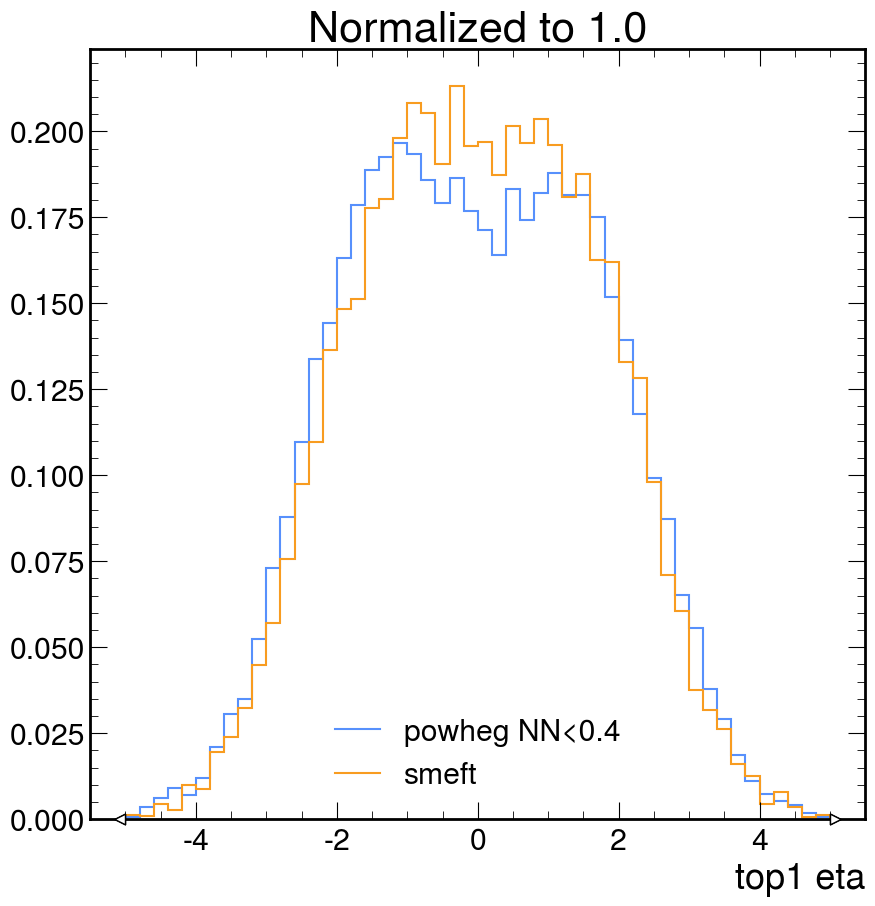

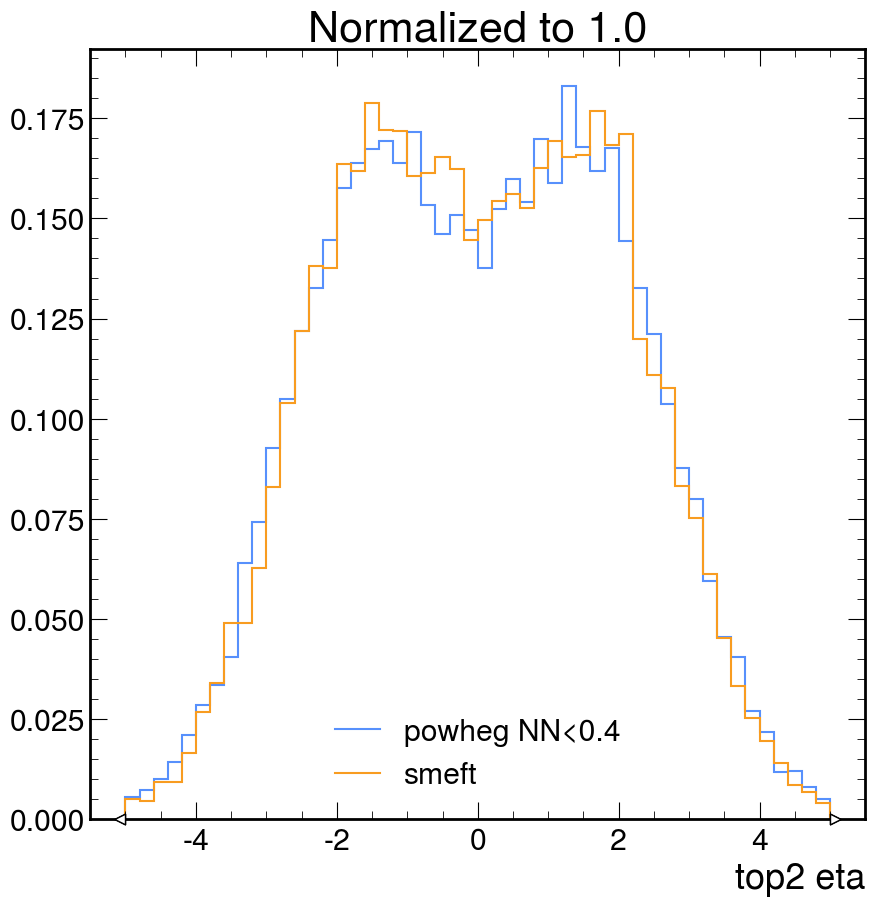

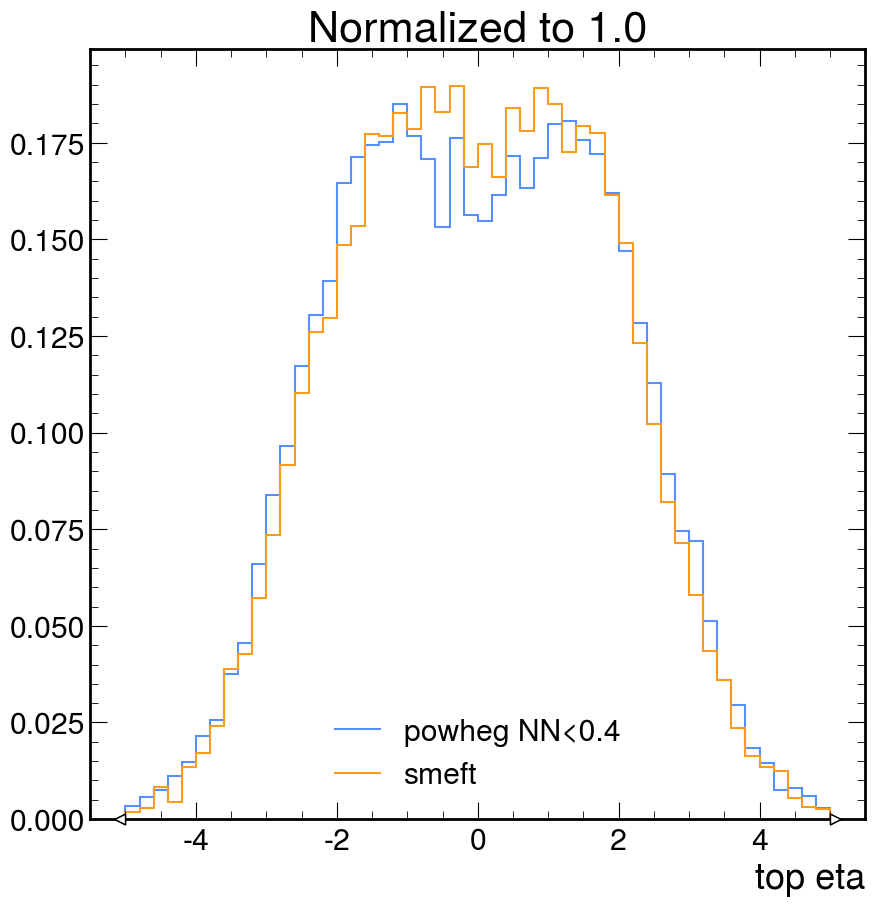

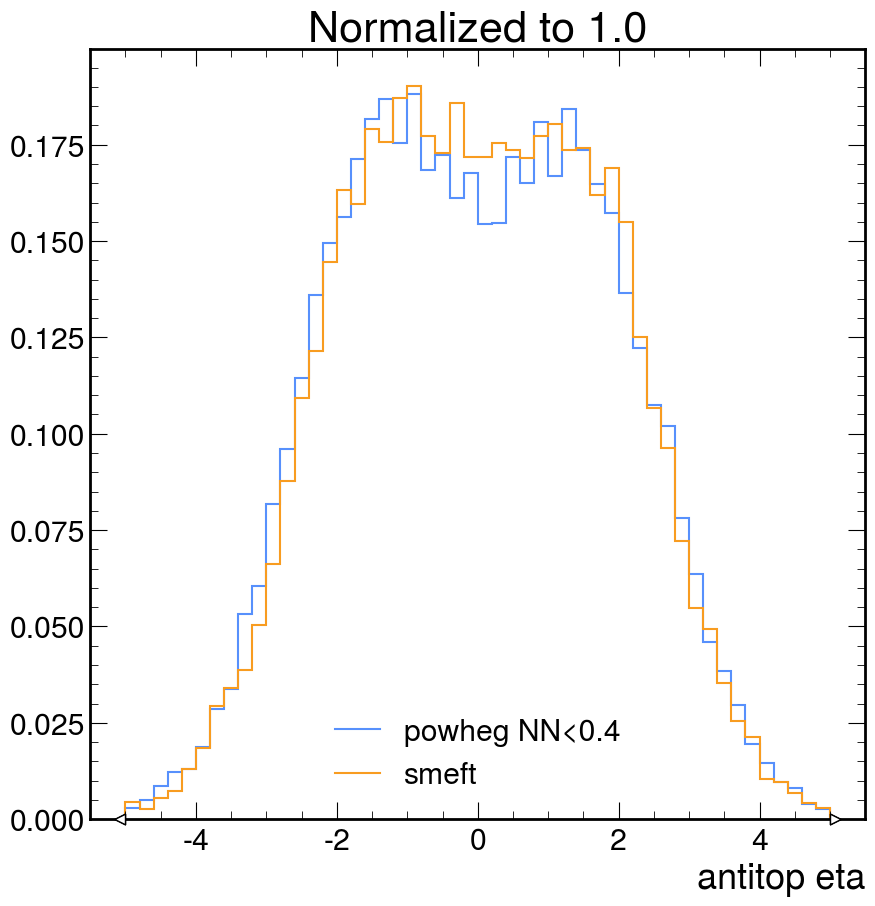

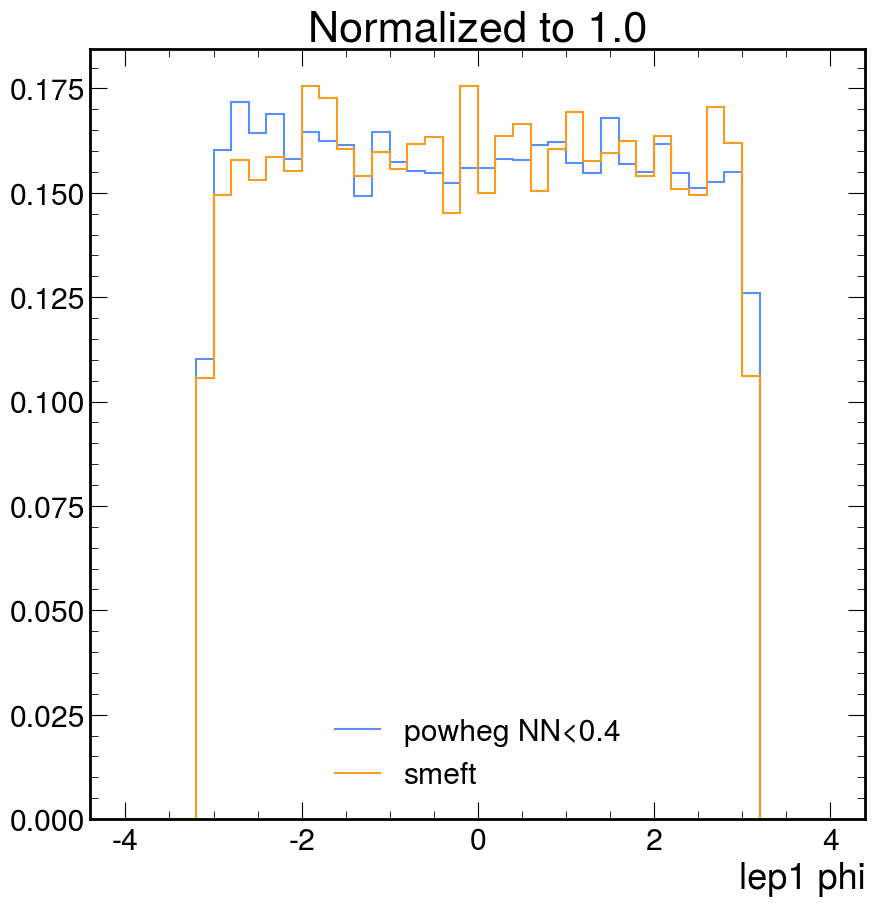

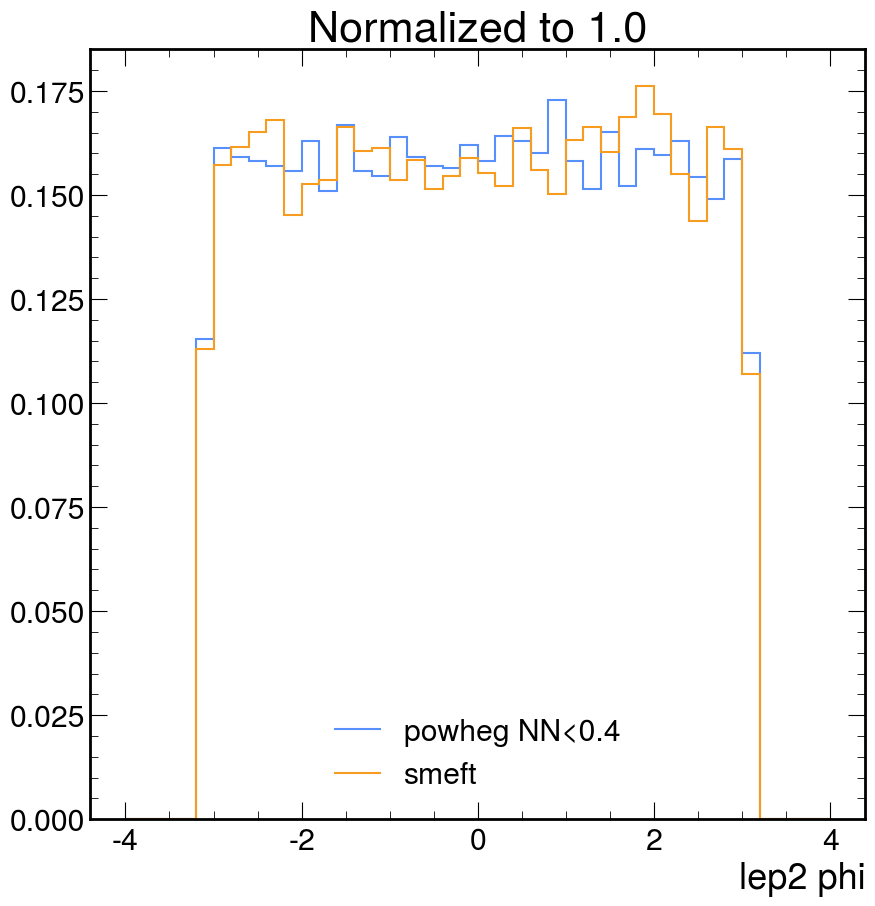

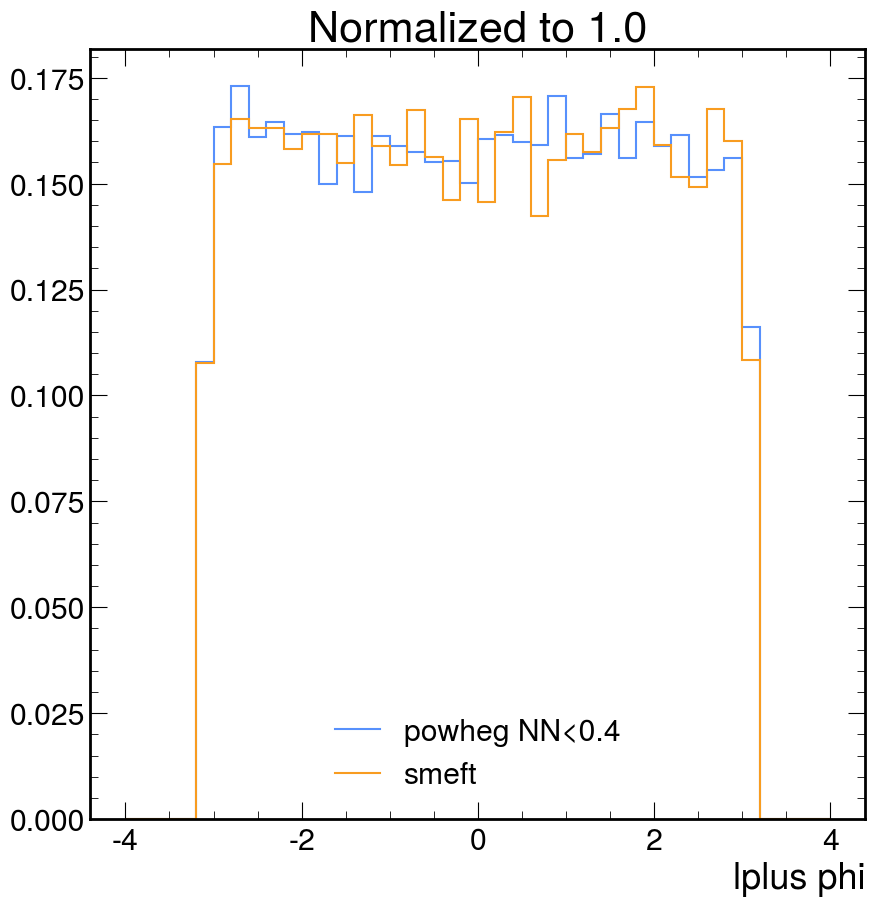

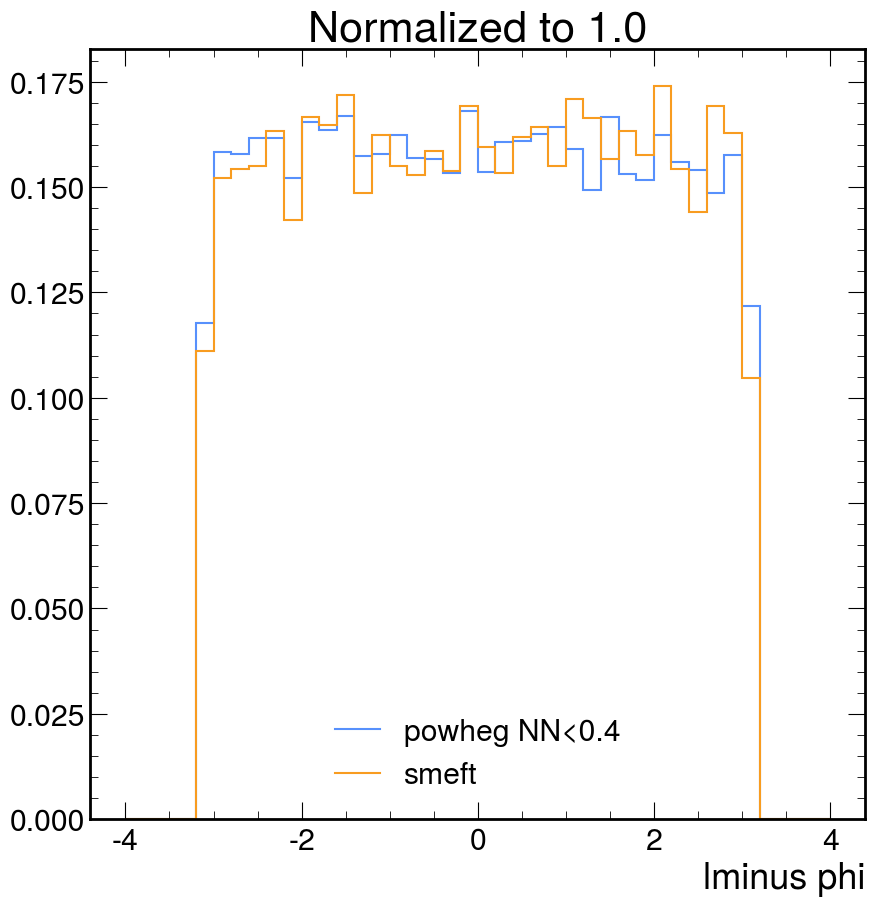

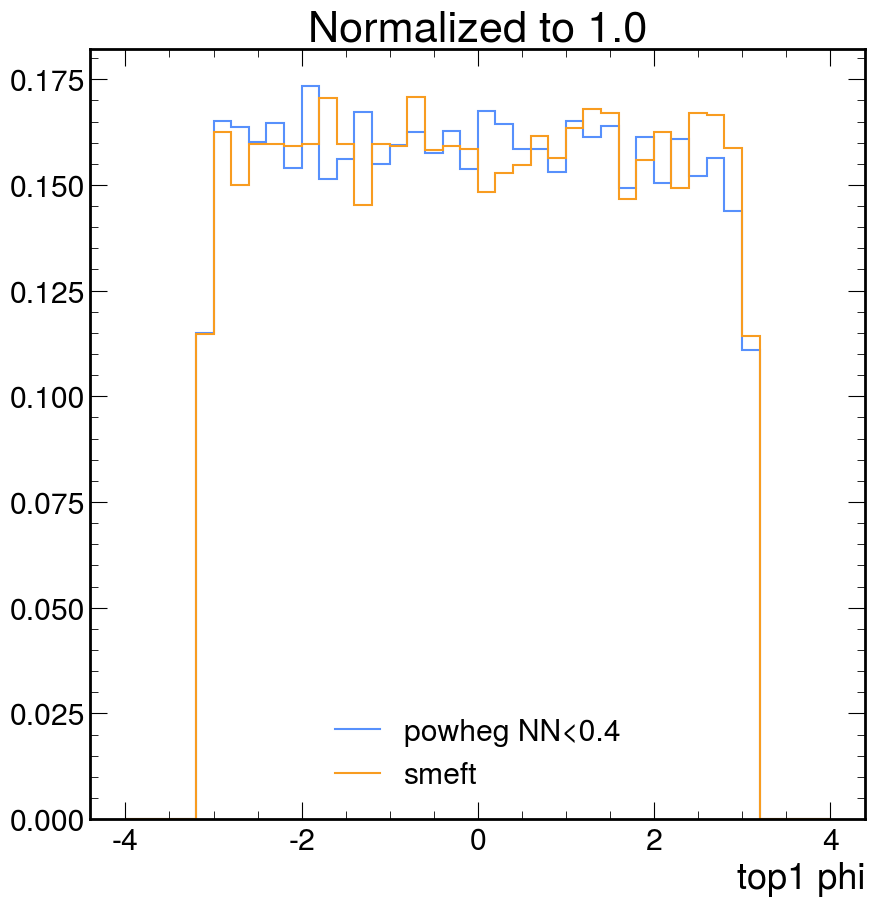

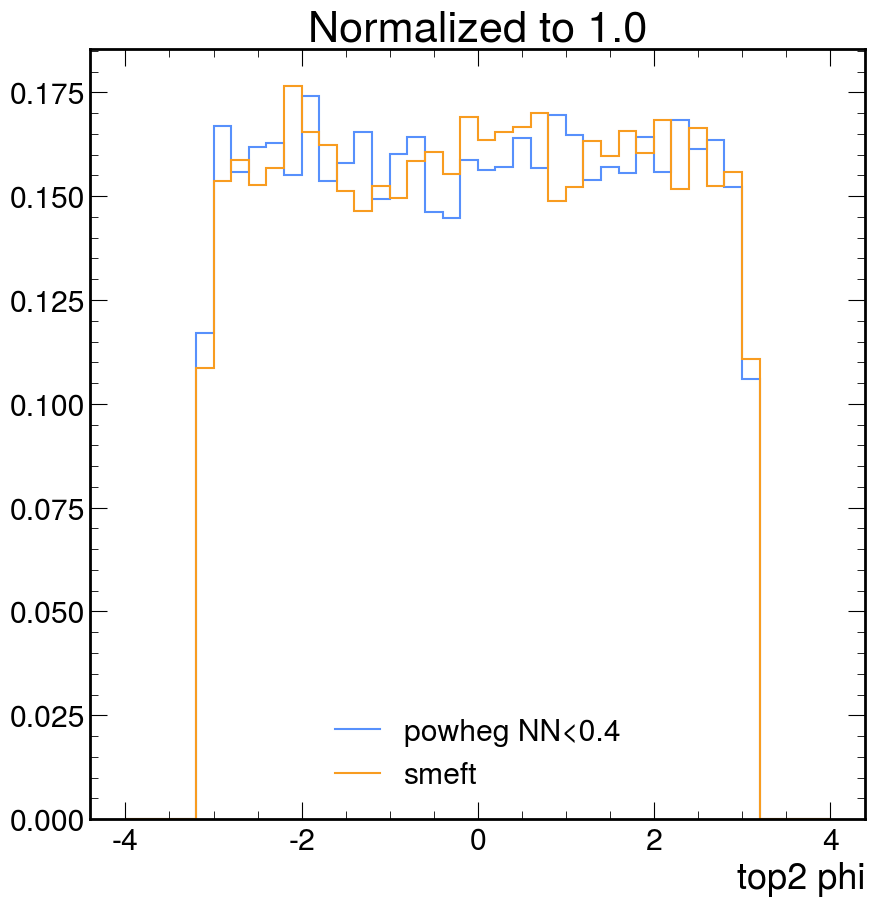

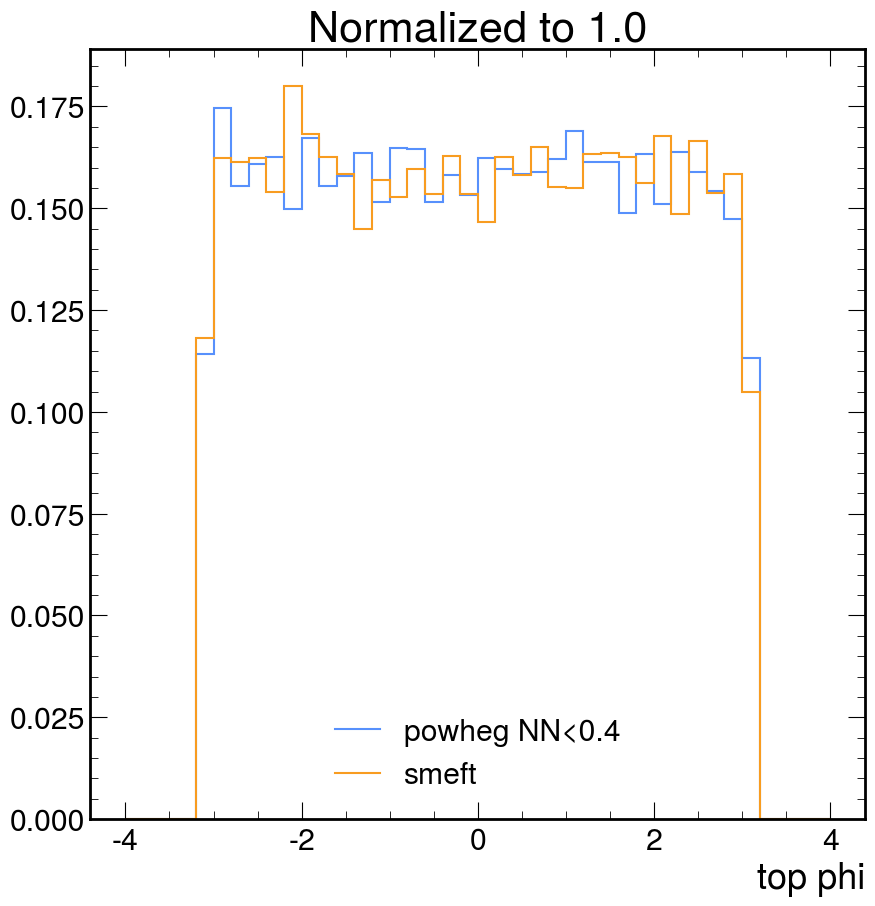

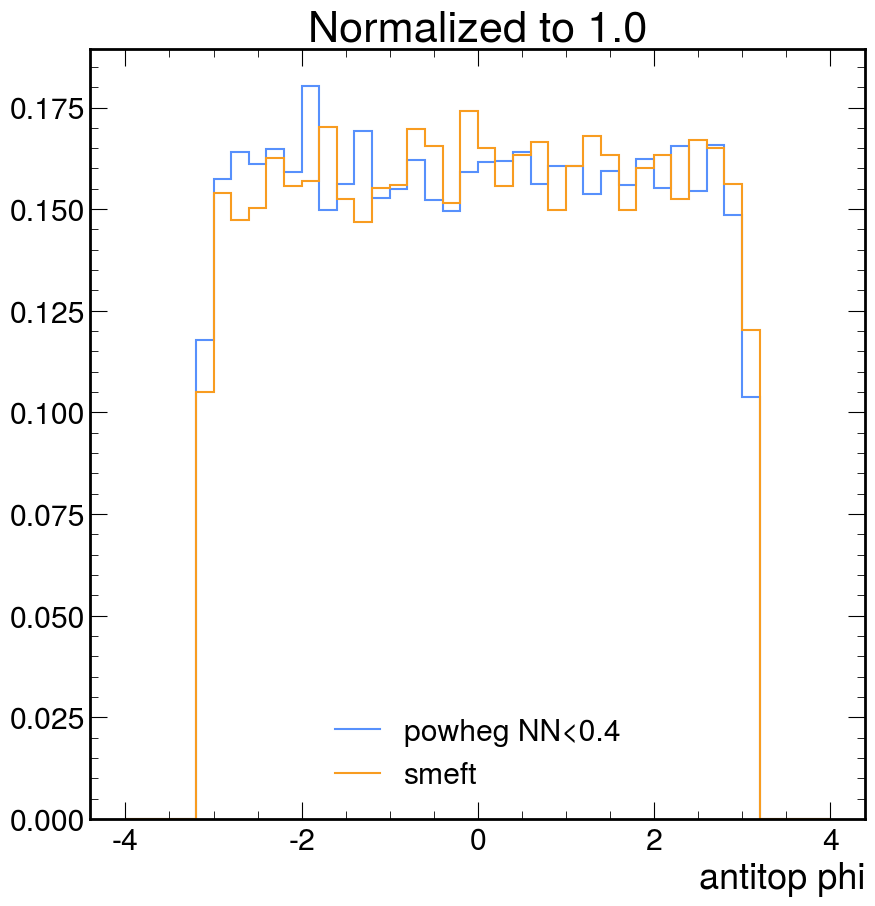

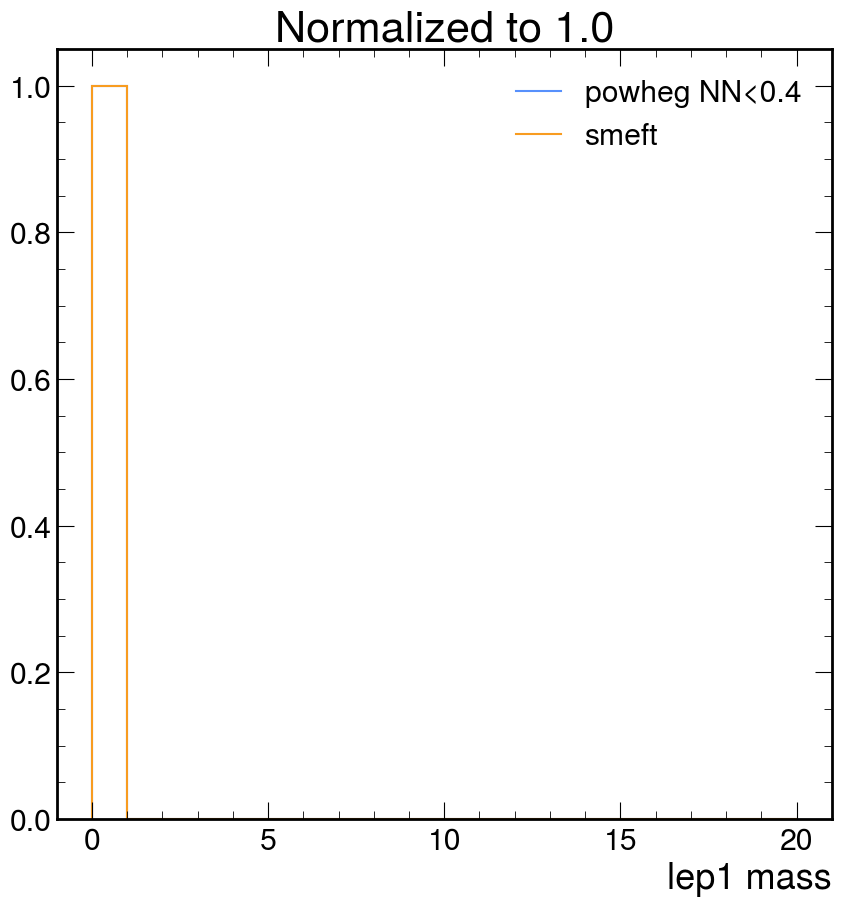

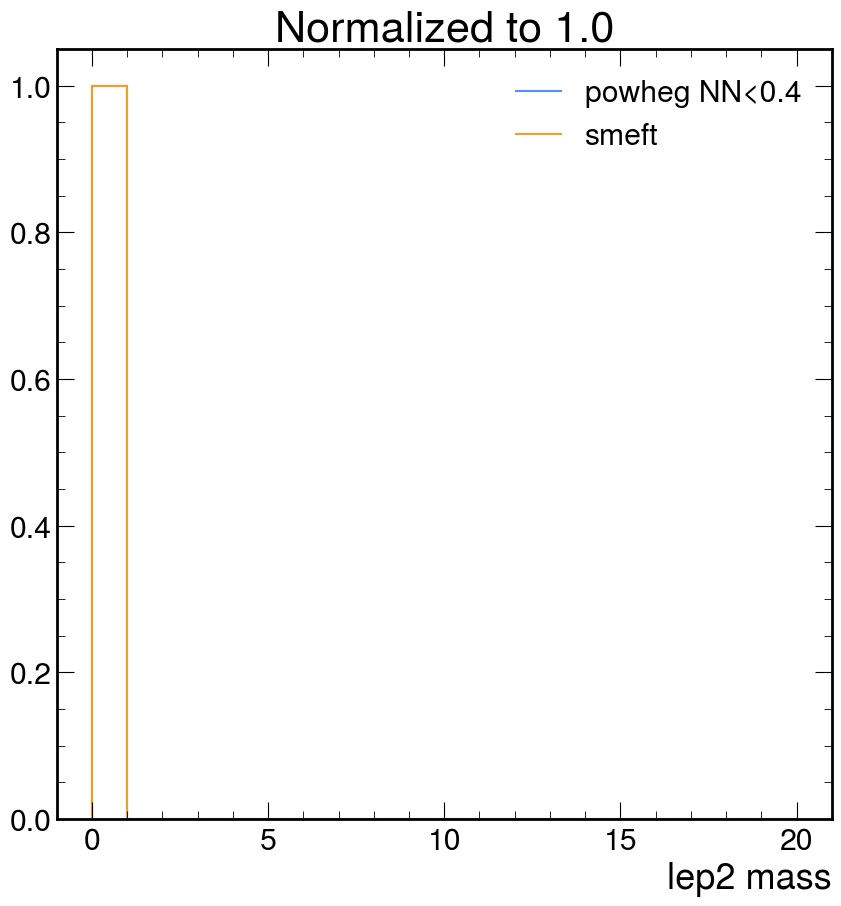

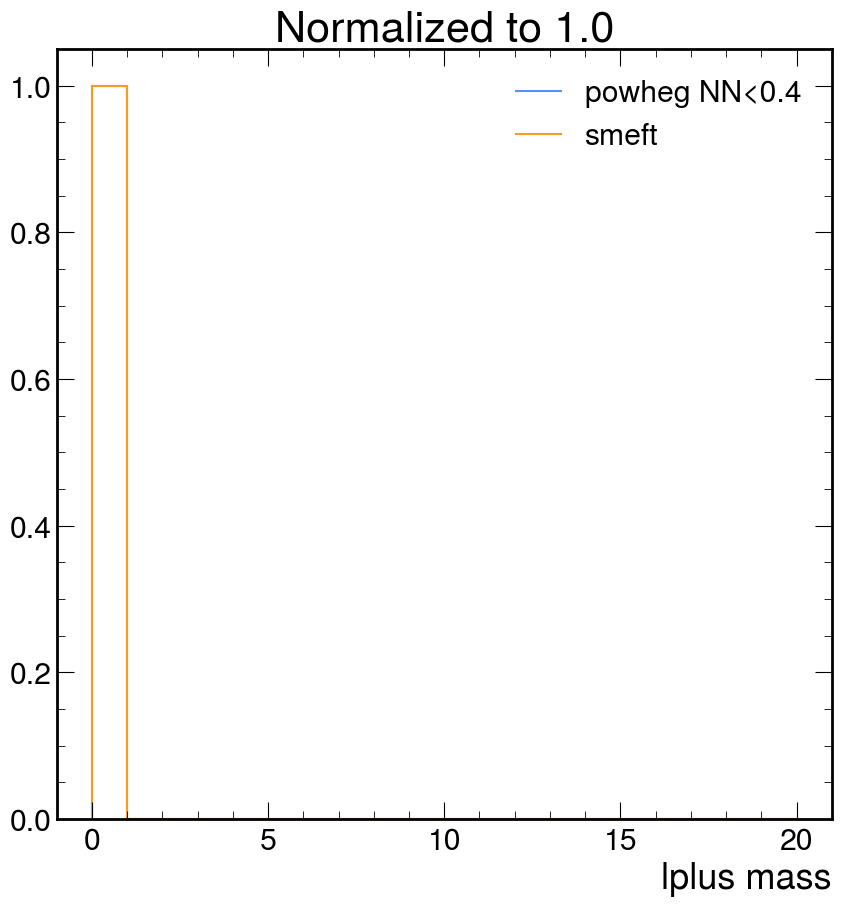

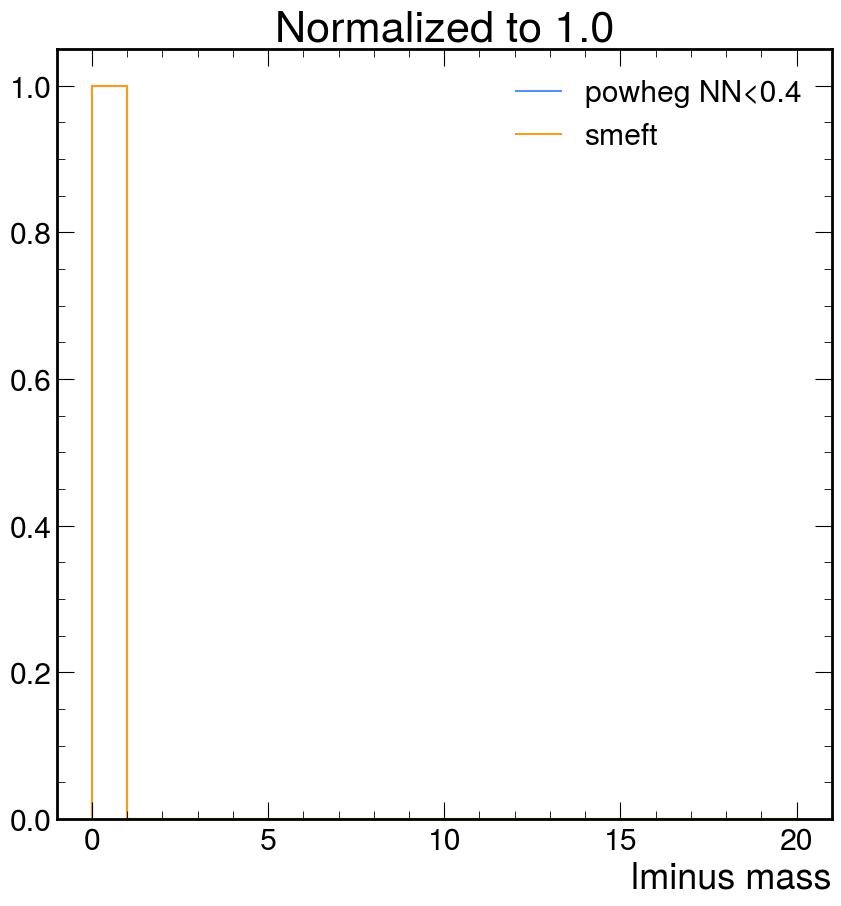

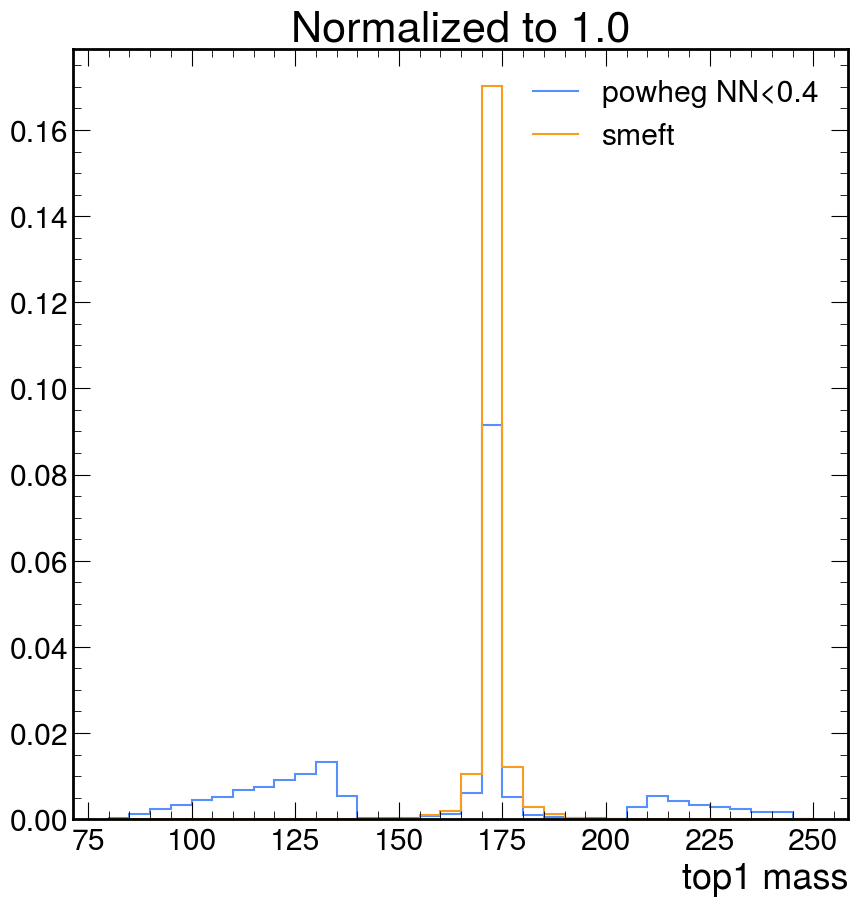

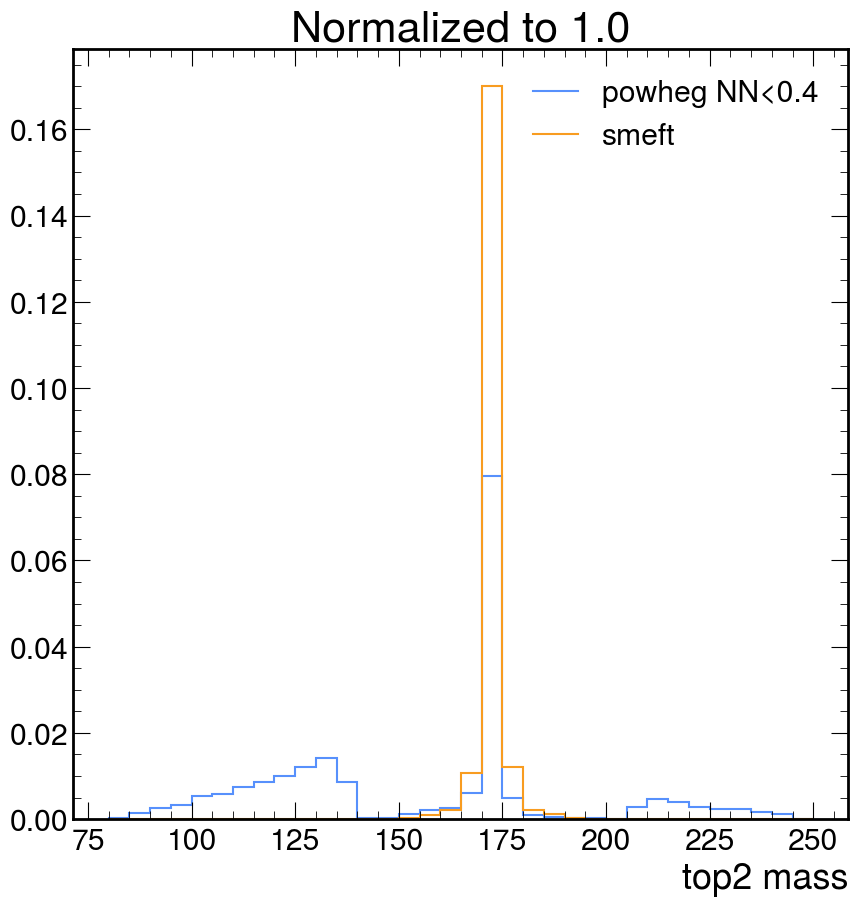

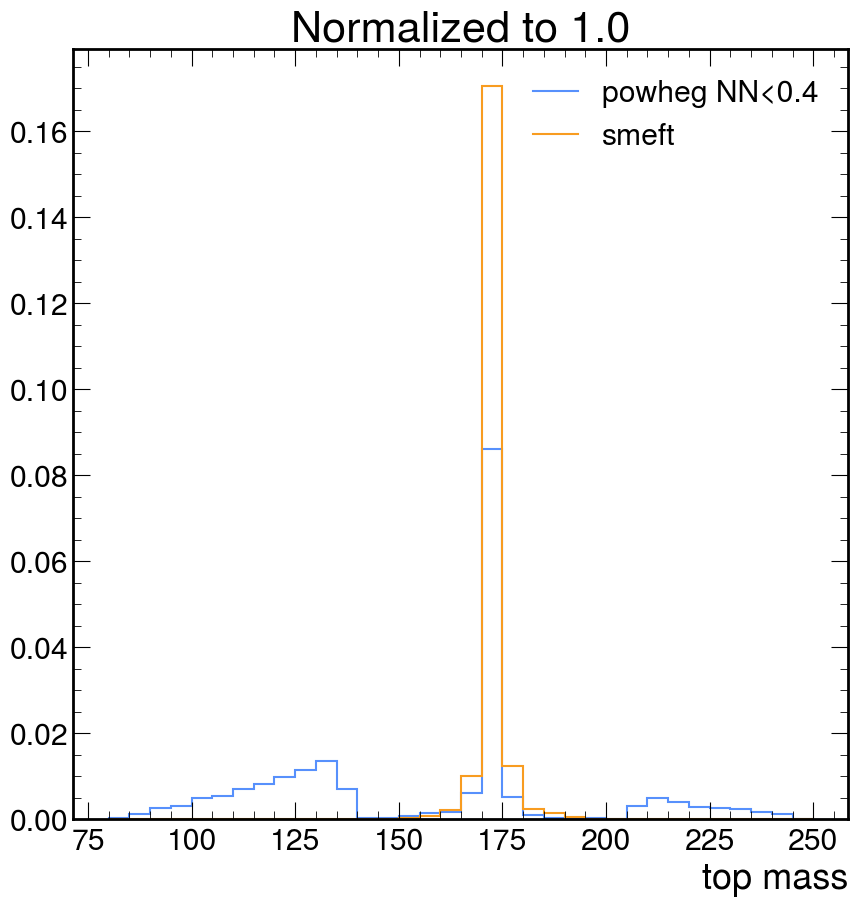

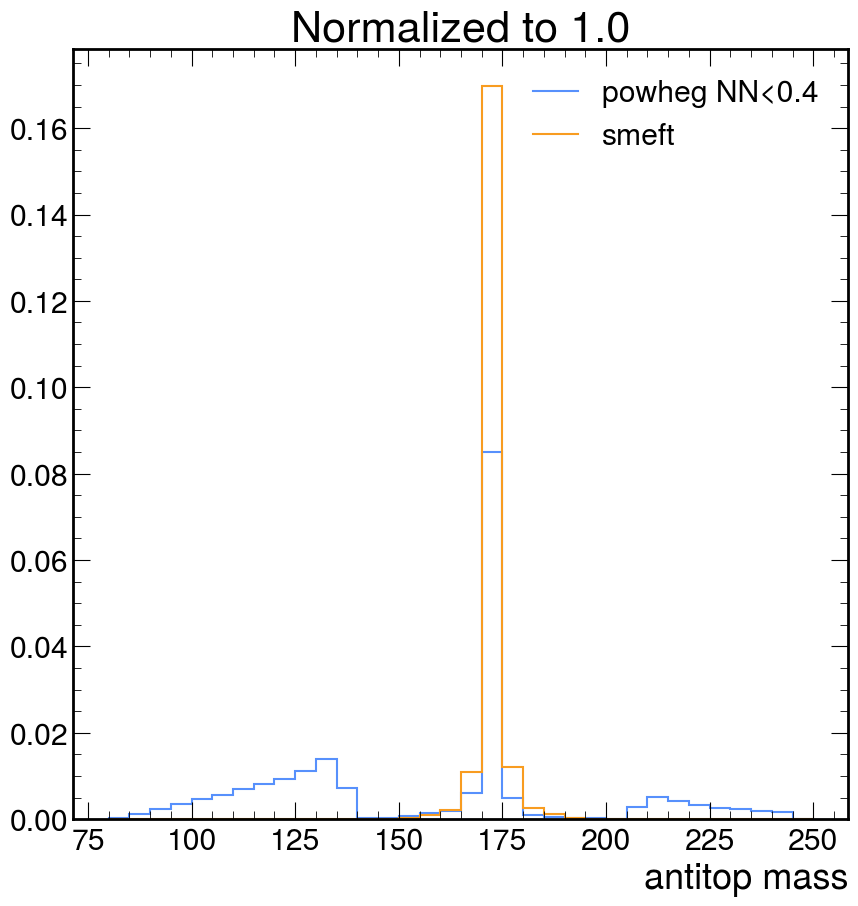

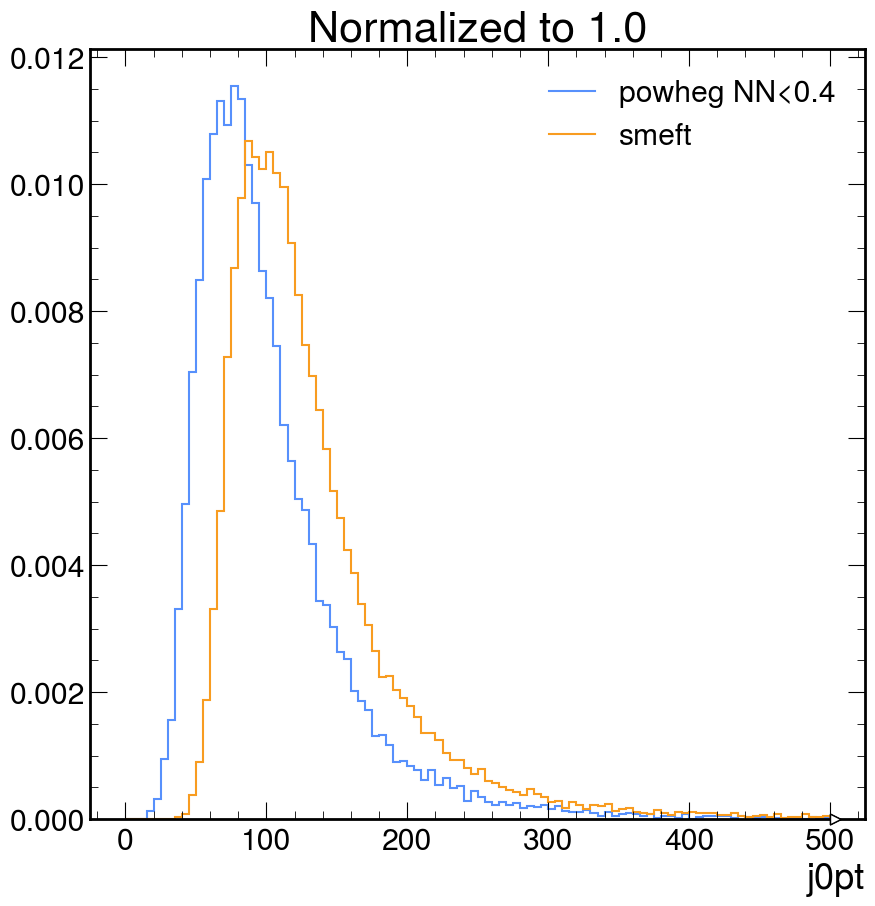

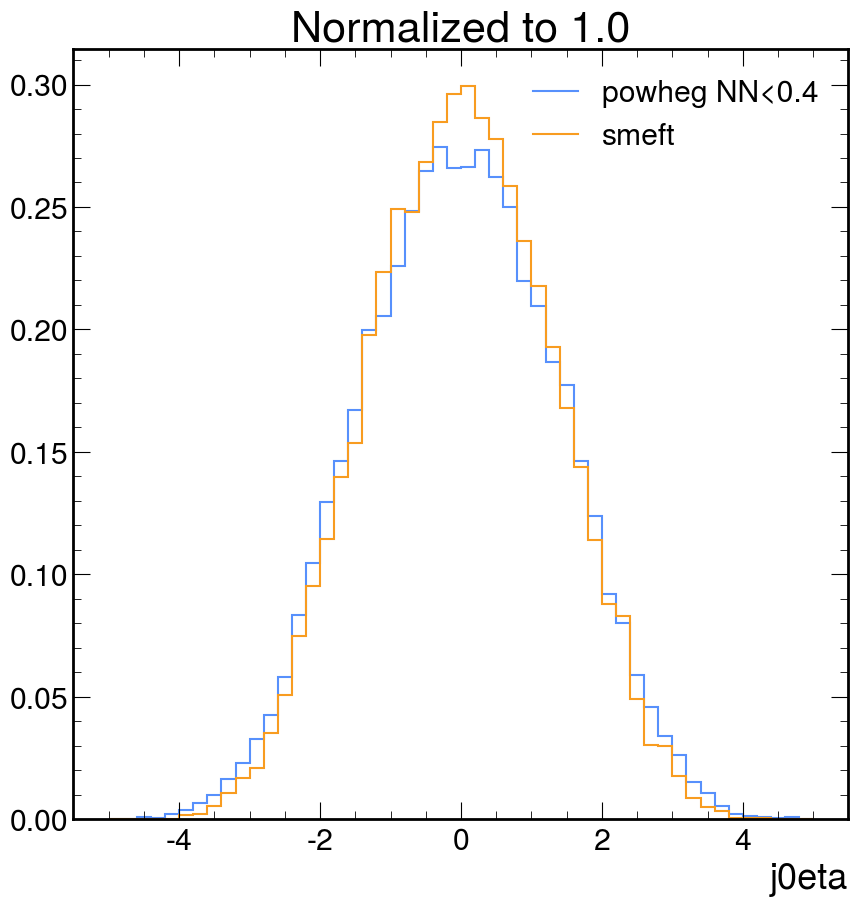

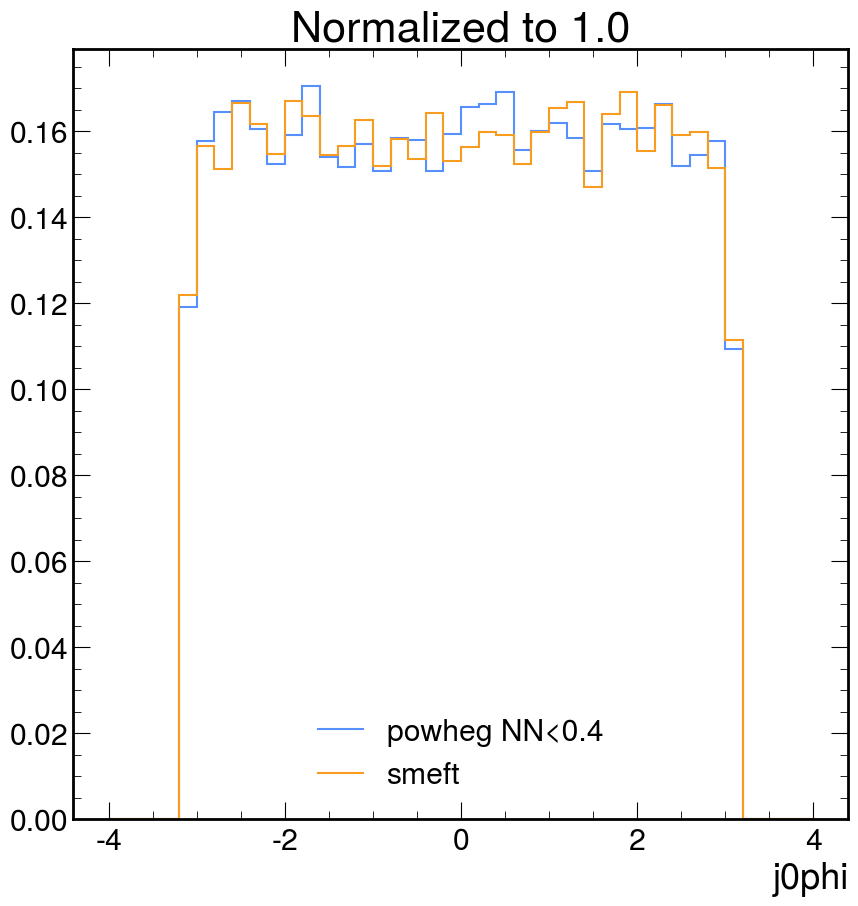

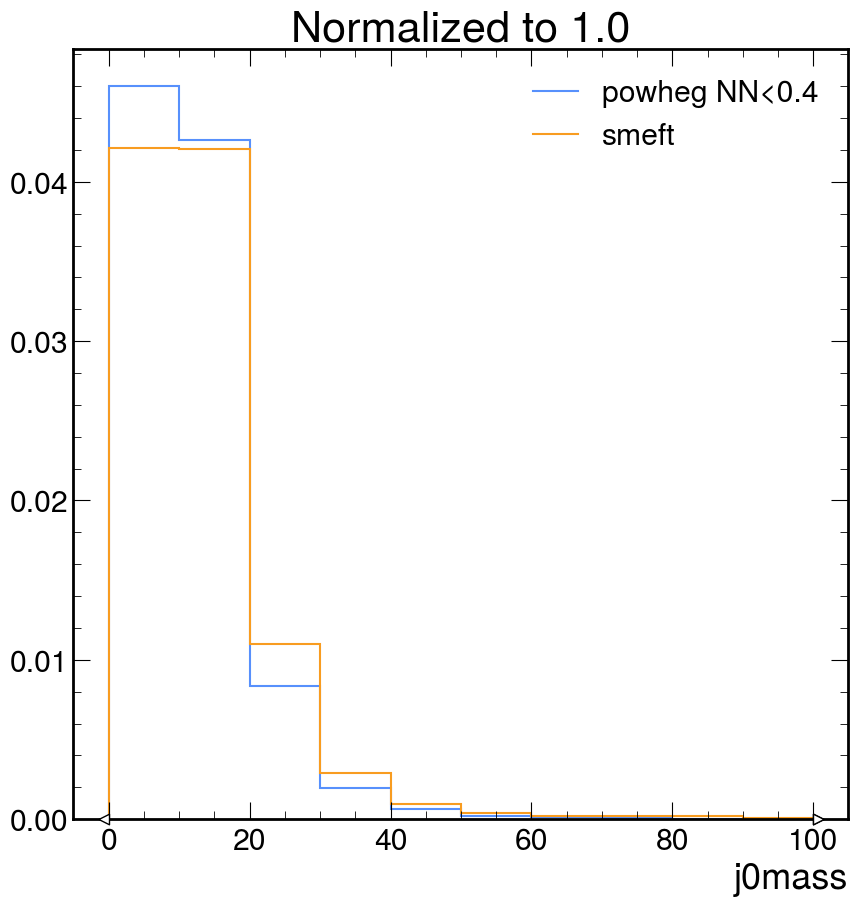

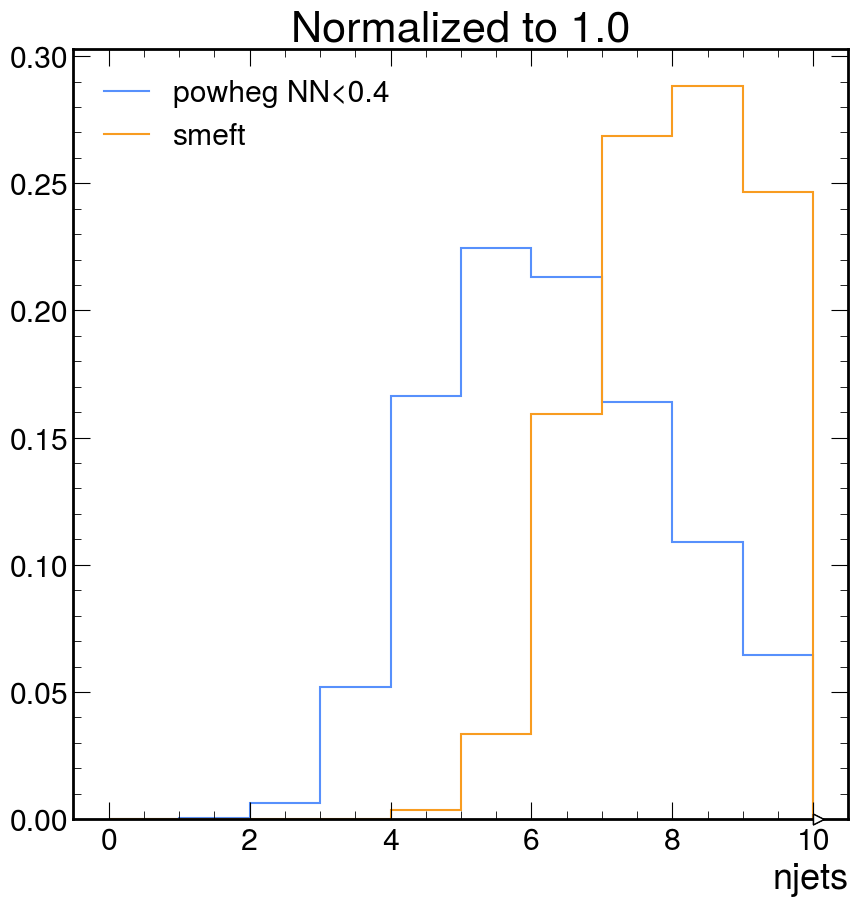

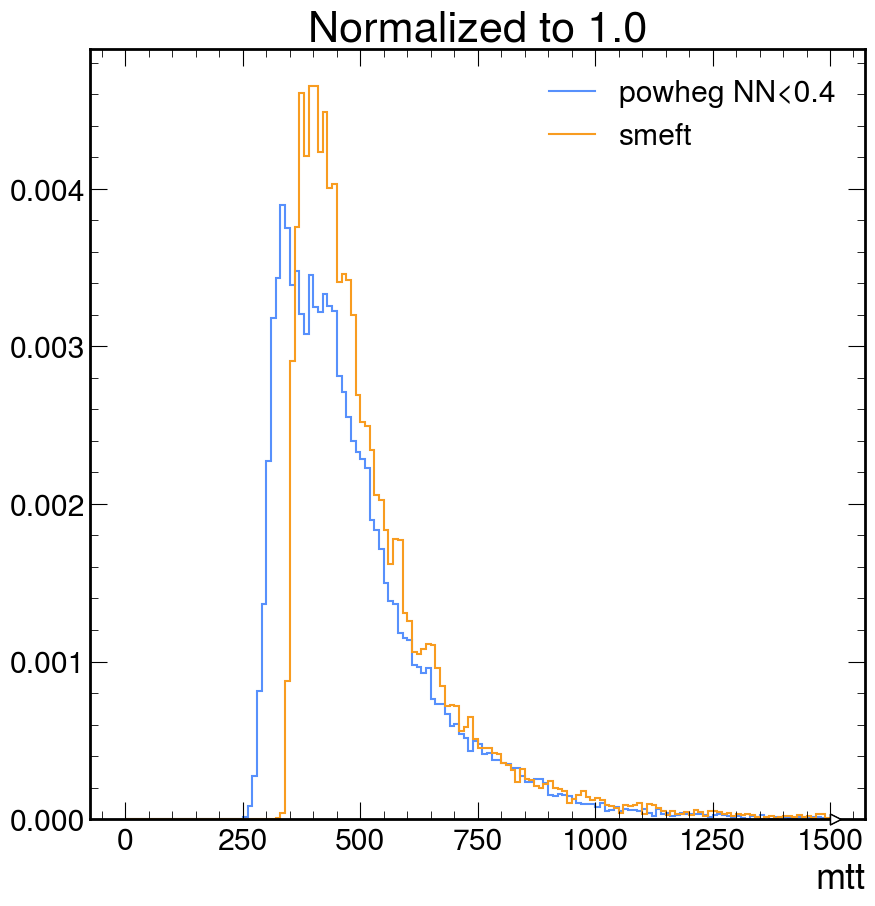

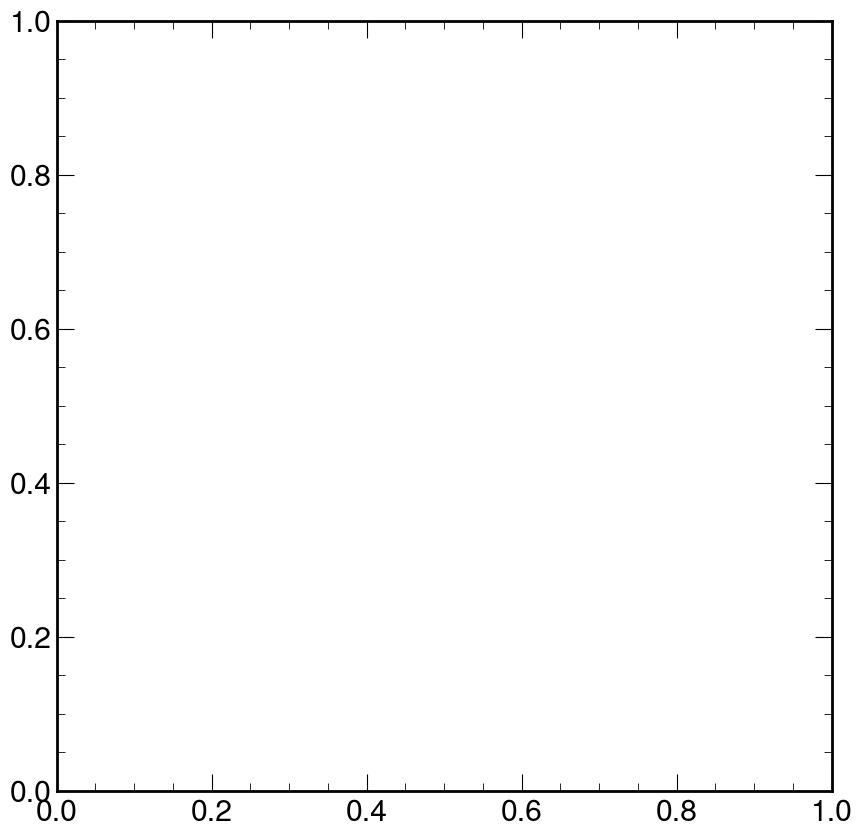

In [8]:
for name in smeft_hists:
    fig, ax = plt.subplots()
    hep.style.use("CMS")
    hep.histplot(powheg_pred_hists[name], density=True, yerr=False, label='powheg NN<0.4')
    hep.histplot(smeft_hists[name], density=True, yerr=False, label='smeft')
    ax.set_title("Normalized to 1.0")
    ax.legend()

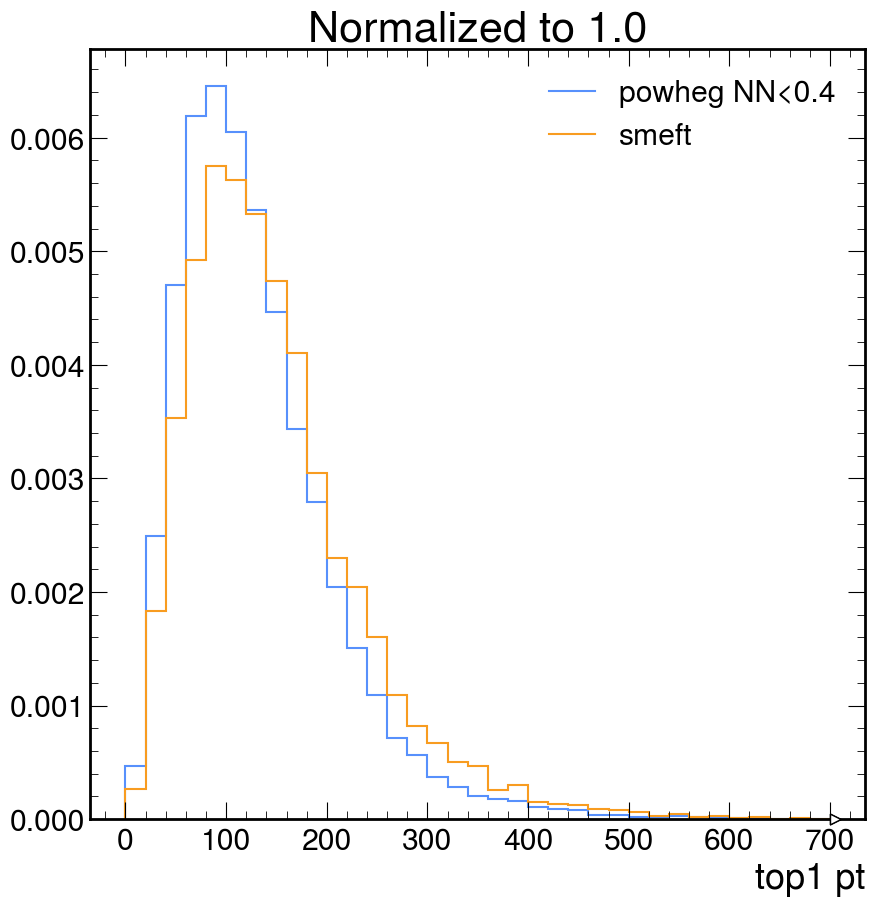

In [7]:
name = "top1pt"
fig, ax = plt.subplots()
hep.style.use("CMS")
hep.histplot(powheg_pred_hists[name], density=True, yerr=False, label='powheg NN<0.4')
# hep.histplot(powheg_bulk_hists[name], density=True,  yerr=False, label='powheg NN<0.04')
hep.histplot(smeft_hists[name], density=True, yerr=False, label='smeft')
ax.set_title("Normalized to 1.0")
ax.legend()
# ax.set_xlim([200, 450])
# fig.savefig(os.path.join(plotdir, f"{name}_zoomed.png"))
# plt.close()

In [47]:
name = "top2jet0"
fig, ax = plt.subplots()
hep.style.use("CMS")
hep.hist2dplot(powheg_cut_hists[name], ax=ax)
ax.set_title("Powheg NN<0.04")
fig.savefig(os.path.join(plotdir, f"{name}.png"))
plt.close()

In [19]:
print(powheg_hists.keys())

pt_list = ['lep1pt', 'lep2pt', 'lpluspt', 'lminuspt', 'top1pt', 'top2pt', 'toppt', 'antitoppt']
eta_list = ['lep1eta', 'lep2eta', 'lpluseta', 'lminuseta', 'top1eta', 'top2eta', 'topeta', 'antitopeta']
phi_list = ['lep1phi', 'lep2phi', 'lplusphi', 'lminusphi', 'top1phi', 'top2phi', 'topphi', 'antitopphi']
mass_list = ['lep1mass', 'lep2mass', 'lplusmass', 'lminusmass', 'top1mass', 'top2mass', 'topmass', 'antitopmass']
jet_list = ['j0pt', 'j0eta', 'j0phi', 'j0mass', 'njets']

dict_keys(['outputs', 'lep1pt', 'lep2pt', 'lpluspt', 'lminuspt', 'top1pt', 'top2pt', 'toppt', 'antitoppt', 'lep1eta', 'lep2eta', 'lpluseta', 'lminuseta', 'top1eta', 'top2eta', 'topeta', 'antitopeta', 'lep1phi', 'lep2phi', 'lplusphi', 'lminusphi', 'top1phi', 'top2phi', 'topphi', 'antitopphi', 'lep1mass', 'lep2mass', 'lplusmass', 'lminusmass', 'top1mass', 'top2mass', 'topmass', 'antitopmass', 'j0pt', 'j0eta', 'j0phi', 'j0mass', 'njets'])


In [73]:
smeft_hists['top1mass'].values()

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+01,
       6.6000e+01, 1.4300e+02, 8.2200e+02, 1.3403e+04, 9.6100e+02,
       2.1400e+02, 9.6000e+01, 2.8000e+01, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [74]:
powheg_bulk_hists['top1mass'].values()

array([      0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,    3131.,    7997.,   16292.,   70846.,
       1038536.,   64452.,   12743.,    5408.,    1915.,       0.,
             0.,       0.,       0.,       0.,       0.,       0.,
             0.,       0.,       0.,       0.])

(-5.0, -3.0)

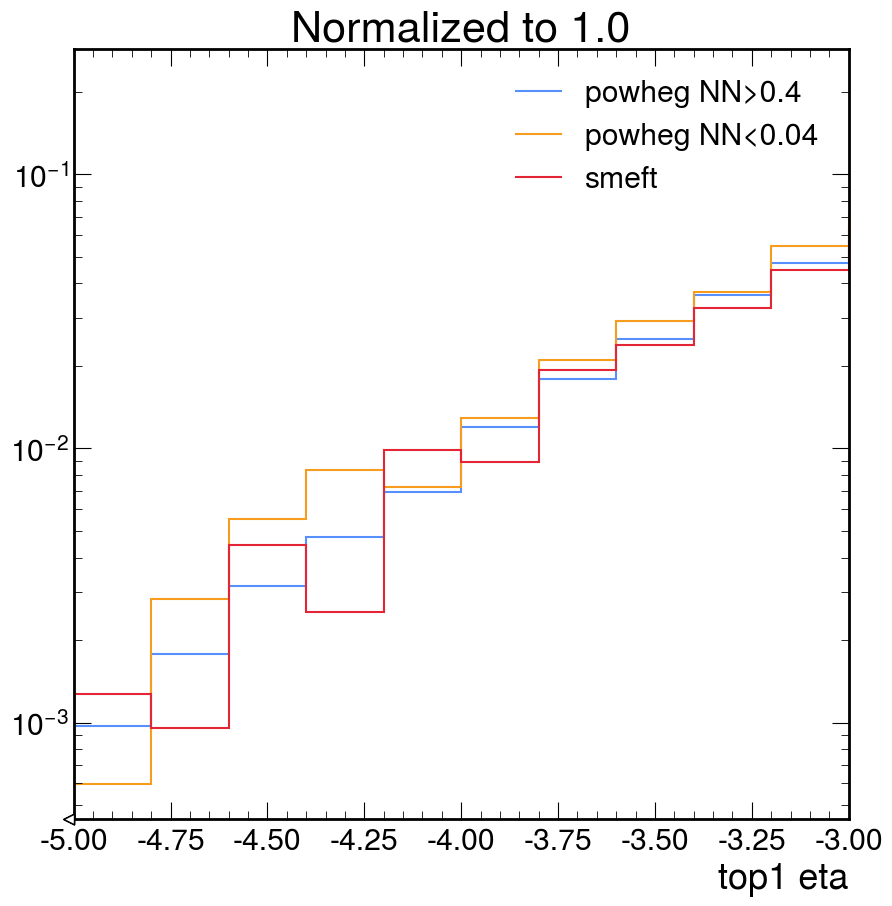

In [103]:
name='top1eta'
hep.style.use("CMS")
fig, ax = plt.subplots()
hep.histplot(powheg_bulk_hists[name], density=True, yerr=False, label='powheg NN>0.4')
hep.histplot(powheg_cut_hists[name], density=True,  yerr=False, label='powheg NN<0.04')
hep.histplot(smeft_hists[name], density=True, yerr=False, label='smeft')
ax.legend(loc='best')
ax.set_title('Normalized to 1.0')
ax.set_yscale('log')
ax.set_xlim([-5, -3])

# fig.savefig(os.path.join(plotdir, f"{name}_zoomed.png"))
# plt.close()

In [71]:
name='j0pt'
hep.style.use("CMS")
fig, ax = plt.subplots()
hep.histplot(powheg_bulk_hists[name], density=True, yerr=True, label='powheg NN>0.4')
hep.histplot(powheg_cut_hists[name], density=True, yerr=True, label='powheg NN<0.04')
hep.histplot(smeft_hists[name], density=True, yerr=True, label='smeft')
ax.legend(loc='best')
ax.set_title('Normalized to 1.0')
ax.set_xlim([0, 150])

fig.savefig(os.path.join(plotdir, f"{name}_zoomed.png"))
plt.close()

ValueError: Plotting multiple histograms must have the same dimensionality

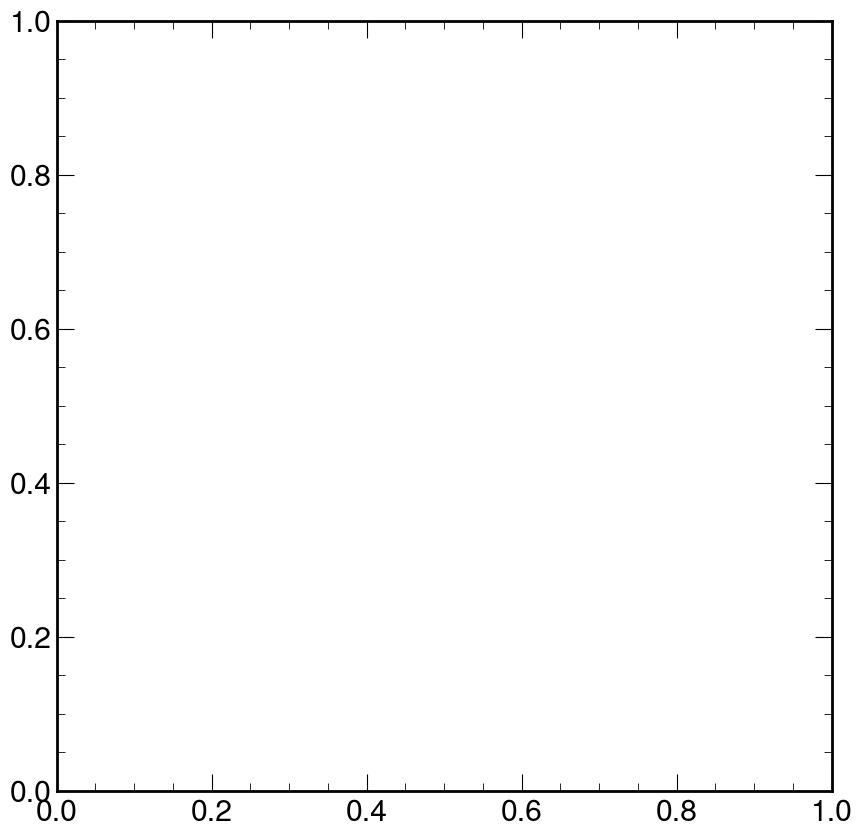

In [66]:
for name in powheg_hists.keys(): 
    hep.style.use("CMS")
    fig, ax = plt.subplots()
    hep.histplot(powheg_bulk_hists[name], density=True, yerr=True, label='powheg NN>0.04')
    hep.histplot(powheg_cut_hists[name], density=True, yerr=True, label='powheg NN<0.04')
    hep.histplot(smeft_hists[name], density=True, yerr=True, label='smeft')
    ax.legend(loc='best')
    ax.set_title('Normalized to 1.0')
    
    fig.savefig(os.path.join(plotdir, f"{name}.png"))
    plt.close()